In [1]:
#импортируем все библиотеки, которые нам могут пригодиться
import pandas as pd
import numpy as np

from scipy import stats as st
import matplotlib.pyplot as plt

import seaborn as sb

import warnings #чтоб на ошибки не ругался
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('/Users/aleksandrivanov/Downloads/games.csv')

Шаг 2. Подготовьте данные

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.shape

(16715, 11)

In [7]:
df.duplicated().sum() #проверим самое легкое, явных дубликатов нет

0

In [8]:
#переименуем столбцы шапки 
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 
              'other_sales', 'critic_score', 'user_score', 'rating']
#нашел позже альтернативный и более простой вариант df.columns.str.lower(), оставлю на память тут...

In [9]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [10]:
#посмотрим что с пропусками
df.isnull().sum() #на почти 17 тысяч игр почти нет пропусков в названии, жанре и в информации по продажам. 
#в годах так же небольшое количество, т.е. основная проблема в пропусках это столбцы с рейтингом

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Здесь очень старая игра, у которой нет имени, жанра, мы ей ничем не можем помочь :)

In [12]:
df[df['year_of_release'].isna()].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


у некоторых игр пропущен год, но он фигурирует в наименовании, таких значений не так много, мы спасем где-то может в лучшем случае половину игр, но эти 100 игр на фоне почти 17 тысяч значений, они не повлияют особо 

In [13]:
df[df.duplicated(['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [14]:
df[df.duplicated(subset=['name', 'platform'])] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [15]:
df[df['name'] == 'Need for Speed: Most Wanted'] #проверим на примере одной игры, название и платформа совпадает, но разный год релиза

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [16]:
df[df.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [17]:
df[df['name'] == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [18]:
df = df.drop (index= 16230 )

In [19]:
df[df['name'] == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E


In [20]:
df.dropna(subset=['name'], inplace=True) # удалаяем пропущенные названия игр
df.dropna(subset=['year_of_release'], inplace=True) # удаляем пропущенный год выпуска
df.dropna(subset=['genre'], inplace=True) # удаляем пропущенный жанр, хотя эта же строчка и удалилась с удалением по имени

Разберемся с tbd: To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". В нашем случае получается, что итоговый рейтинг пользователей ещё не сформировался

In [21]:
df['user_score'] = df['user_score'].replace('tbd', np.nan) #заменим tbd на Nan, по смысловой нагрузке это одинаково

In [22]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [23]:
df['user_score'] = df['user_score'].astype('float') #пригодится потом для корреляции

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [25]:
df['year_of_release'] = df['year_of_release'].astype('int64') #уберем точки и нули из значений года, здесь это не нужно

In [26]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [27]:
#посчитаем суммарные продажи во всех регионах
df['total_sales'] =  df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Рассмотрим уникальные значения, но в стоблце название, год, цифры по продаже и оценке смысла их смотреть нет

In [28]:
df['platform'].unique() #здесь всё ок

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [29]:
df['genre'].unique() #здесь всё ок

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [30]:
df['rating'].unique() #рейтинг К-А это старое обозначение, до 1996 использовалось, посмотрим, если данное значение не улетит
# за ненадобностью, то придется его менять на современное

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [31]:
df['rating'] = df['rating'].fillna('unknown')

Шаг 3. Проведите исследовательский анализ данных

<Axes: >

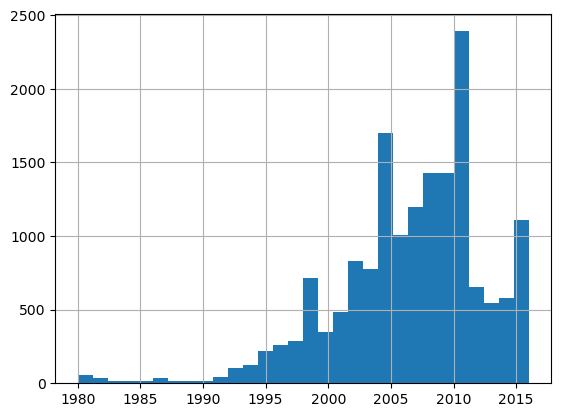

In [32]:
df['year_of_release'].hist(bins=30) #по результатам гистограммы предлагаю выкинуть все игры до 1993 года

In [33]:
df = df.query ('year_of_release >=1993')

<Axes: >

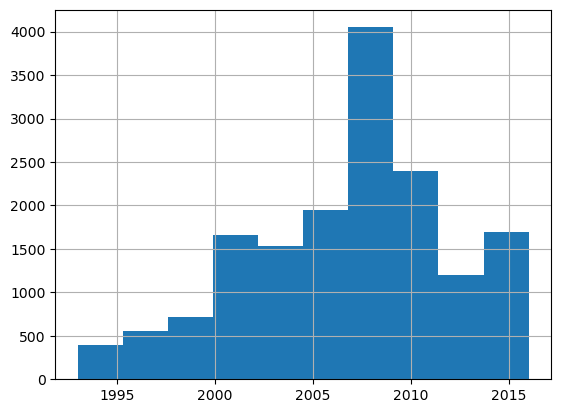

In [34]:
df['year_of_release'].hist()

In [35]:
df.isnull().sum() 
#выкинули старые года, количество пропусков сократилось, значит основную массу проблем несут более старые позиции

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8159
user_score         8679
rating                0
total_sales           0
dtype: int64

In [36]:
df['rating'].unique() #старый рейтинг остался, возможно,  в будущем необходимо будет его заменить

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Шаг 3. Проведите исследовательский анализ данных

•	Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды

In [37]:
df.groupby('year_of_release')['year_of_release'].count() #в цифровом значении основная масса игр вышла в 2008-2010 года, 
#далее начинается спад в наших данных
#в 93 году игр было выпущено всего 60 игр, в 2002 году было удвоение игр на фоне 2001 года.
#изначально была идея сделать сразу срез по 2002 году, но тогда будет сложно понять среднюю продолжительность жизни платформы

year_of_release
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

<Axes: xlabel='year_of_release'>

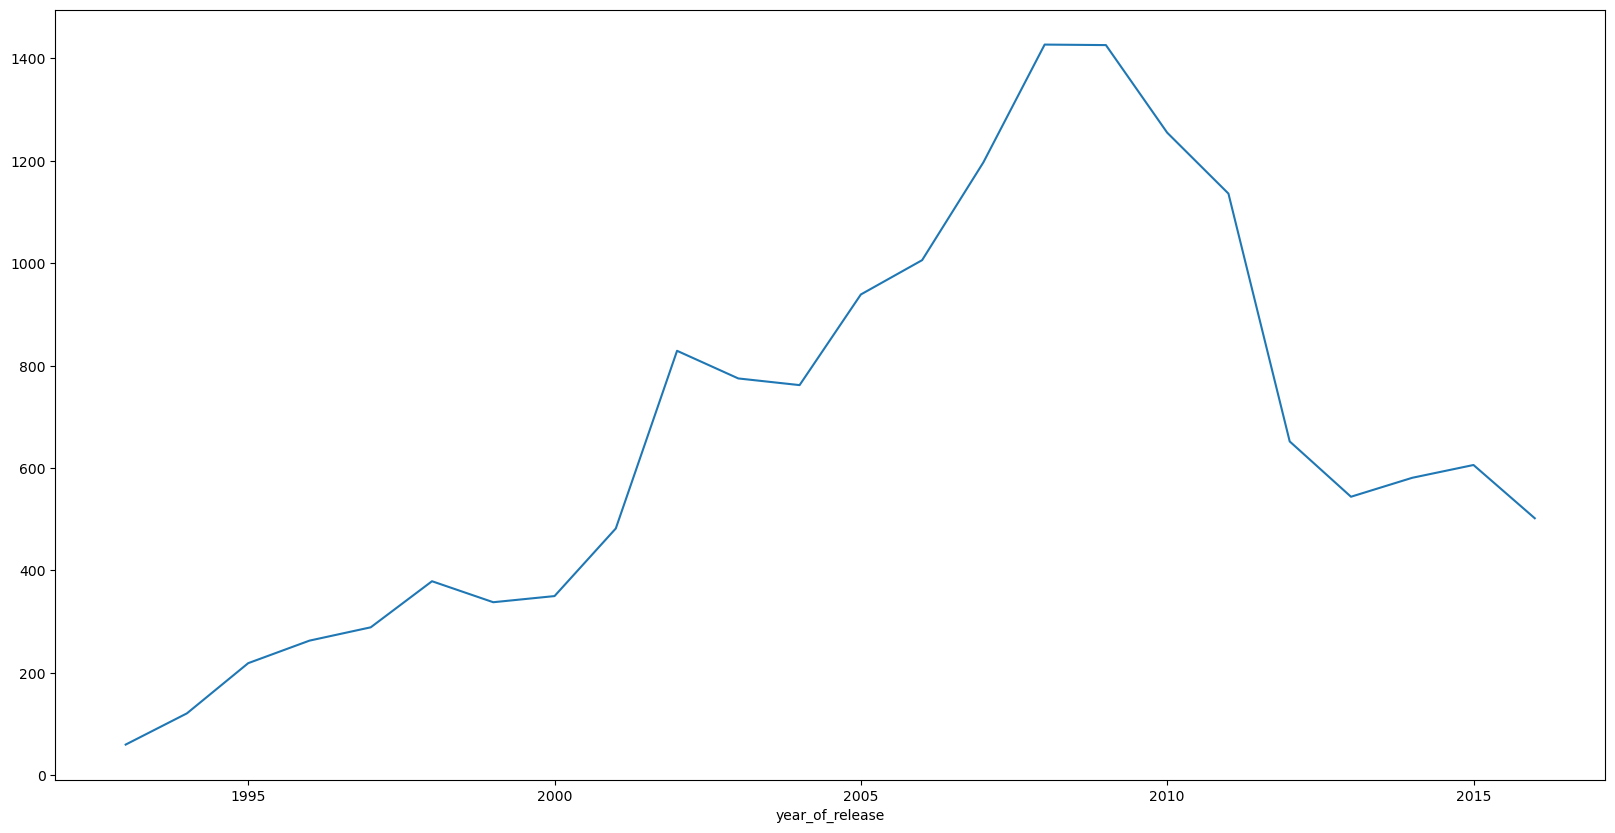

In [38]:
df.groupby('year_of_release')['year_of_release'].count().plot(kind='line', figsize=[20, 10])

•	Посмотрите, как менялись продажи по платформам. 
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 
За какой характерный срок появляются новые и исчезают старые платформы?

Посмотрим, как продажи зависят по платформам


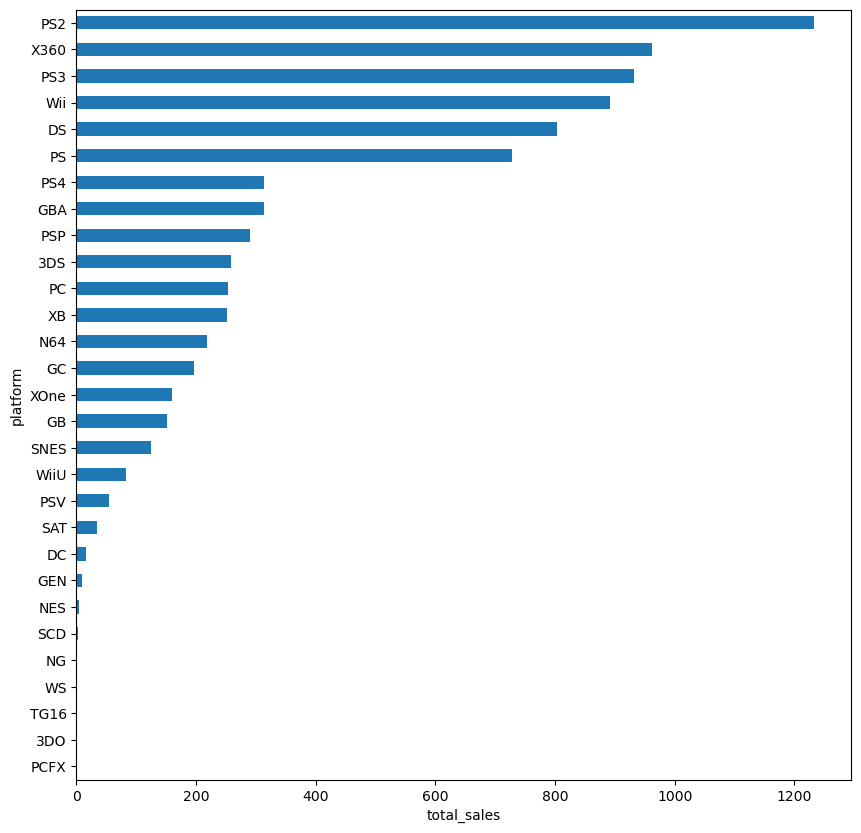

In [39]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=True).plot(kind='barh', figsize=(10,10))
plt.xlabel('total_sales'); #основная масса игр по продажам это для PS2 и X360

In [40]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False) #посмотрим в цифрах

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       252.66
XB       251.57
N64      218.01
GC       196.73
XOne     159.32
GB       152.08
SNES     124.69
WiiU      82.19
PSV       53.81
SAT       33.59
DC        15.95
GEN        8.78
NES        3.72
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
PCFX       0.03
Name: total_sales, dtype: float64

построим красивый график, заодно вспомним seaborn 

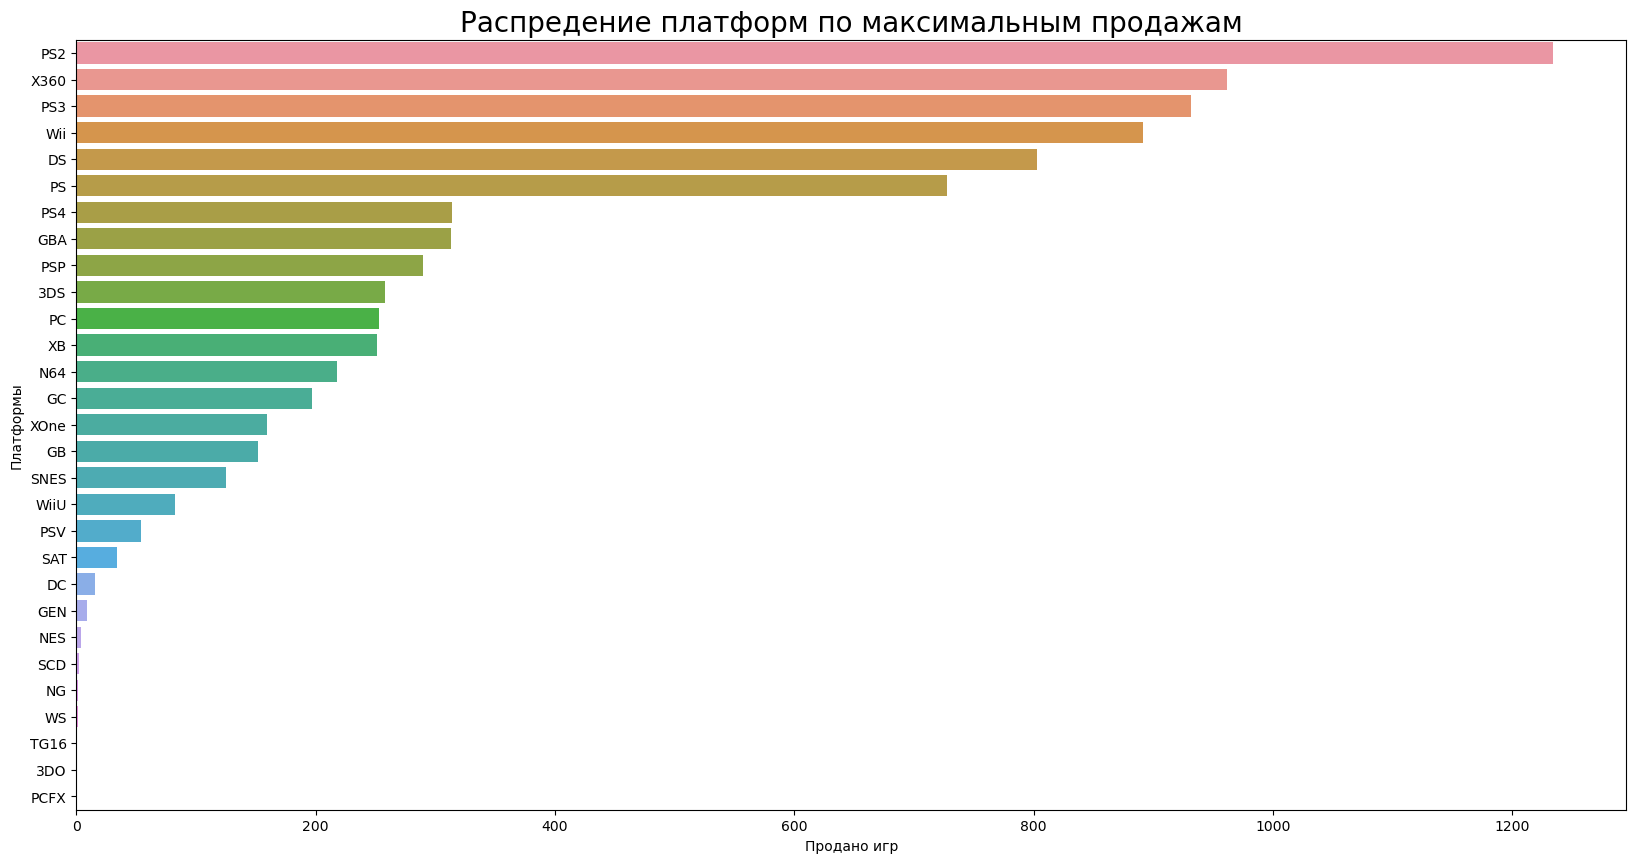

In [41]:
all_platforms = df.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum')\
.sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(20,10))
plt.title('Распредение платформ по максимальным продажам', fontsize=20)
sb.barplot(y=all_platforms.index, x=all_platforms.total_sales)
plt.ylabel('Платформы')
plt.xlabel('Продано игр');

Распределение по годам

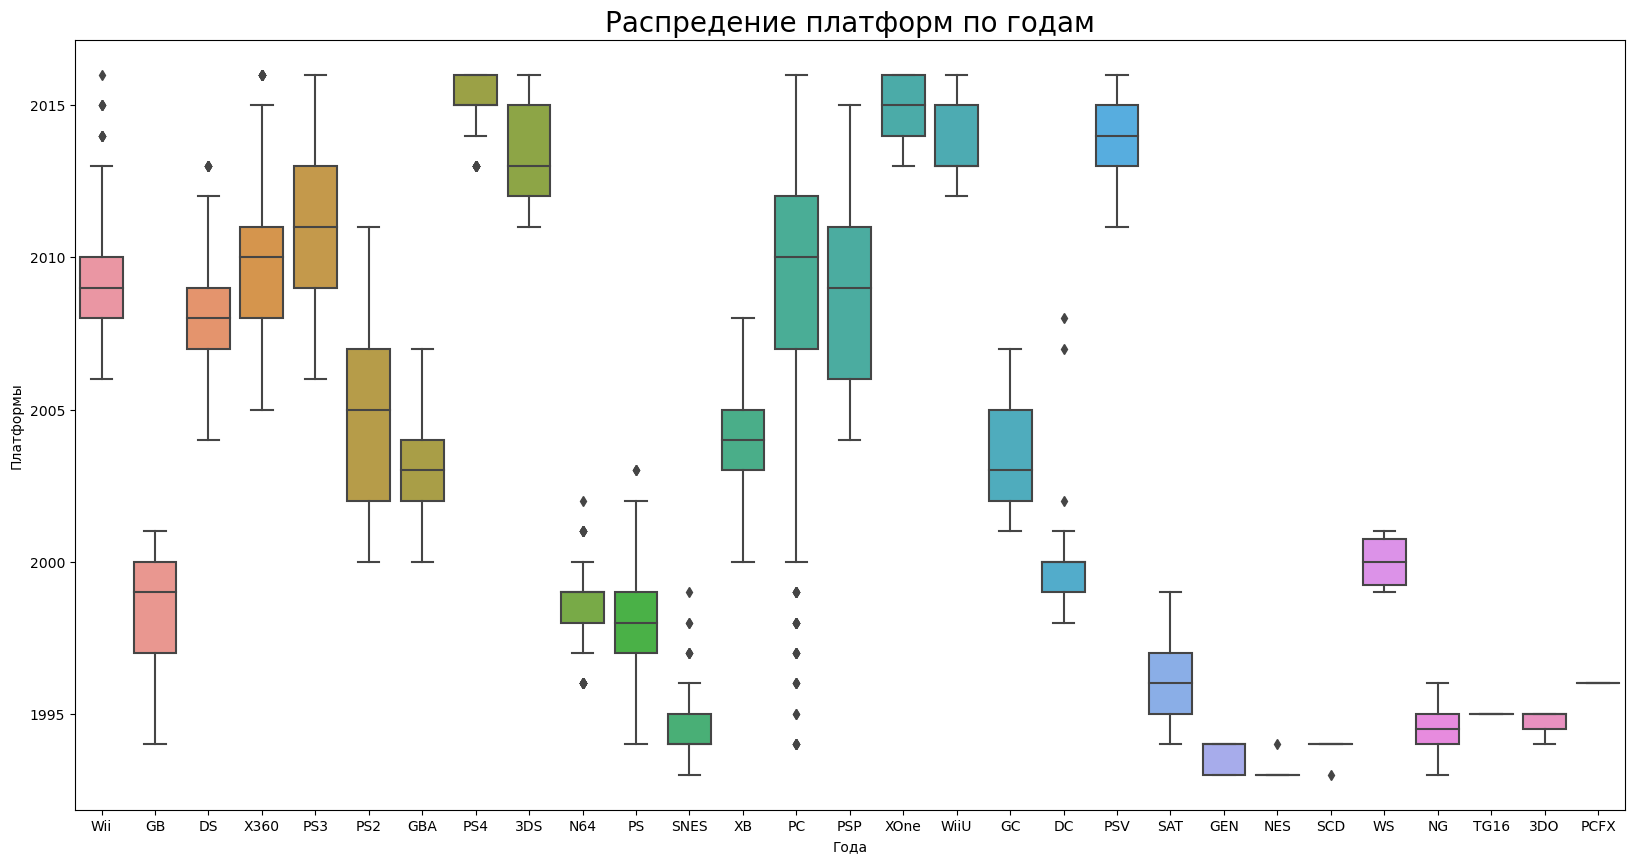

In [42]:
plt.figure(figsize=(20,10))
plt.title('Распредение платформ по годам', fontsize=20)
sb.boxplot(y=df['year_of_release'], x=df['platform'])
plt.ylabel('Платформы')
plt.xlabel('Года');

Первые выводы, которые можно сделать, это каждая платформа имеет свой срок жизни, кроме PC, игры на него начали активно выходить примерно с 2000 года, далее чаще и чаще. Так же если самая массовая платформа была PS2, то с 2014 игры на неё перестали выходить, произошла смена поколений. Игры на PS4 только начали выходить, как и на XOne

За какой характерный срок появляются новые и исчезают старые платформы?

In [43]:
df1 = df.pivot_table(index=['platform'], values='year_of_release', aggfunc=['min','max'])
#создадим дополнительную переменную, чтоб не ломать основной массив
df1['max_min']= df1['max']- df1['min']
display ('Среднее время жизни платформы по медиане',df1['max_min'].median())
display ('Среднее время жизни платформы по средней',df1['max_min'].mean())

'Среднее время жизни платформы по медиане'

6.0

'Среднее время жизни платформы по средней'

6.103448275862069

•	Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [44]:
df1

,min,max,max_min
,year_of_release,year_of_release,
platform,,,
3DO,1994,1995,1
3DS,2011,2016,5
DC,1998,2008,10
DS,2004,2013,9
GB,1994,2001,7
GBA,2000,2007,7
GC,2001,2007,6
GEN,1993,1994,1


Что самое важное мы можем получить из данных по времени жизни платформы и таблицы df1 - самая прибыльная платформа PS2, DS идут на пенсию, так как для прогноза на 2017 год они не актуальны, игры на них не выходят, соответственно надо отсортировать те платформы, на которые игры ещё выходят, взять актуальные года. Для дальнейших исследований возьмем данные от 2015 года

In [45]:
df_2015 = df.query ('year_of_release >=2015')

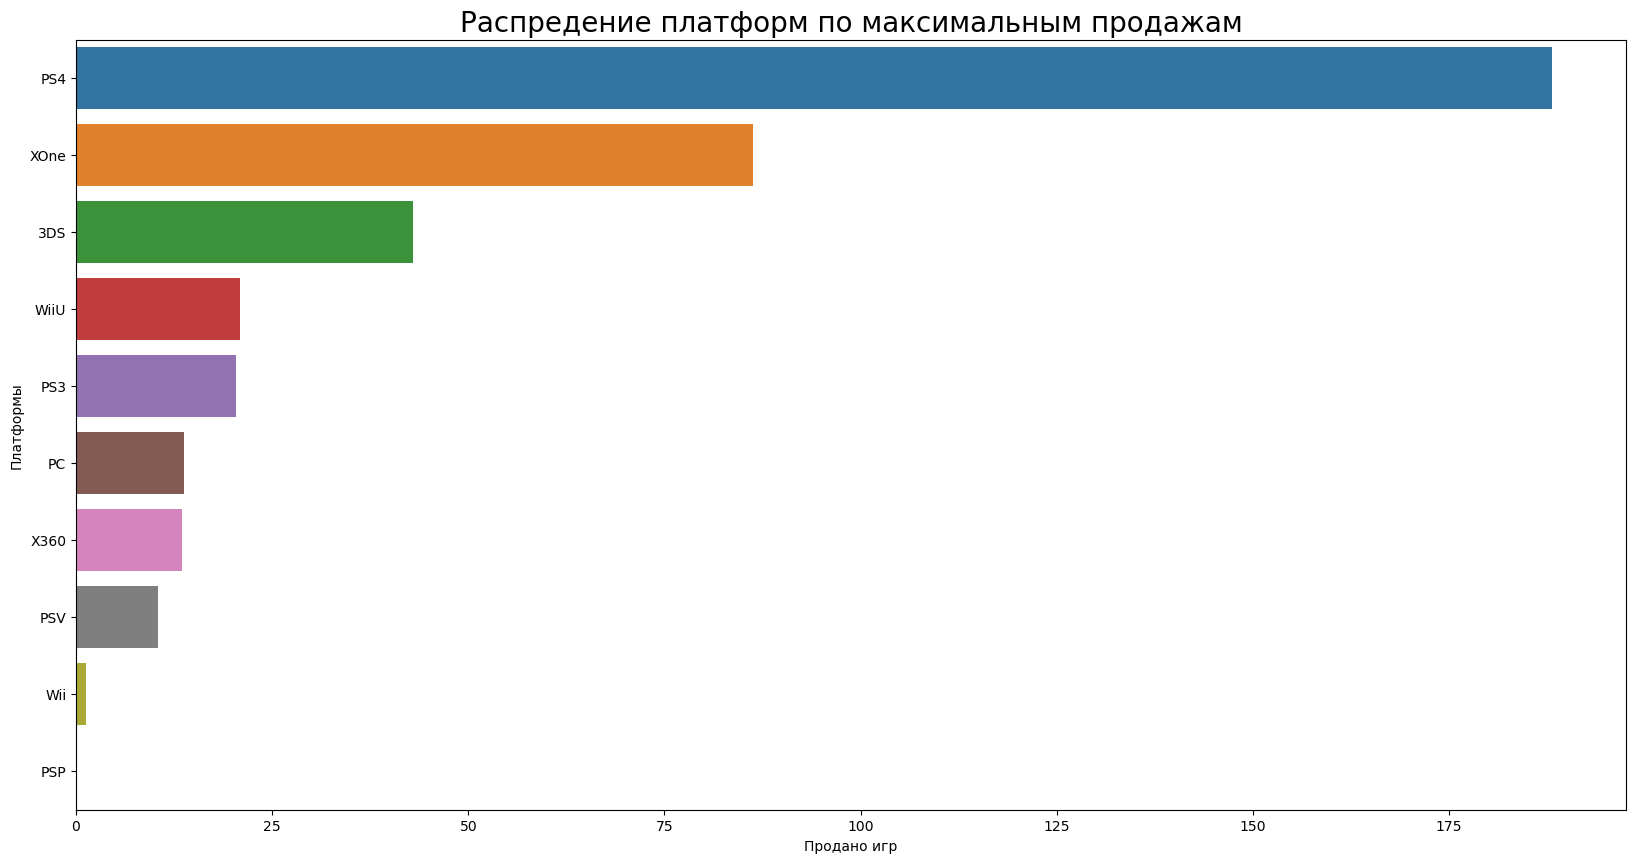

In [46]:
all_platforms1 = df_2015.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum')\
.sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(20,10))
plt.title('Распредение платформ по максимальным продажам', fontsize=20)
sb.barplot(y=all_platforms1.index, x=all_platforms1.total_sales)
plt.ylabel('Платформы')
plt.xlabel('Продано игр');

а если посмотреть, на что не выходило игр уже в 2016 году

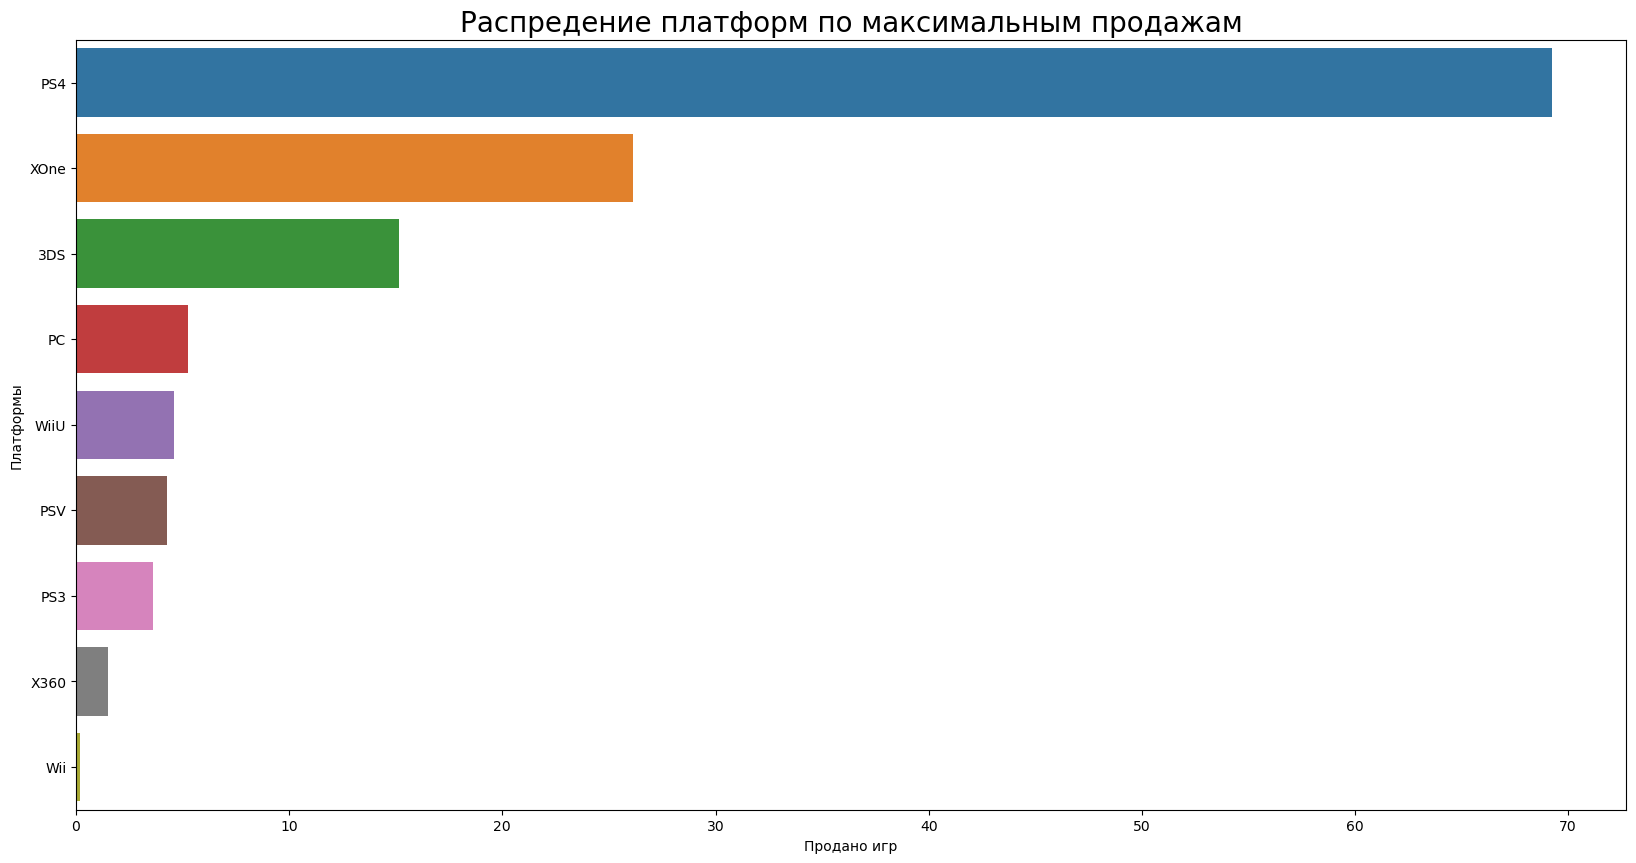

In [47]:
df3 = df.query ('year_of_release >=2016')
all_platforms1 = df3.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum')\
.sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(20,10))
plt.title('Распредение платформ по максимальным продажам', fontsize=20)
sb.barplot(y=all_platforms1.index, x=all_platforms1.total_sales)
plt.ylabel('Платформы')
plt.xlabel('Продано игр');

- PS4, XOne, 3DS, PC оставляем, 
- PC оставляем, так как игры на него выходят уже 22 года, он анамалия на фоне других платформ, поэтому не вижу смысла его выкидывать. При этом у него относительно одинаковое количество игр что в 2015 году, что в 2016 году
- Количество игр на PS3 и X360 за 1 год сократилось в 2 раза, с учетом среднего времени жизни платформы - эти данные есть смысл выкинуть.
- WiiU, первая игра на эту платформу в 2011 году, в 2017 году с учетом медианы, данная платформа ещё будет живая, поэтому её так же есть смысл оставить, но её продажи сильно падают, хорошо бы из дополнительных источников того времени, а не википедии 2022 года, получить информацию по этой платформе, что происходит, почему не настолько старая платформа в 2016 году выпустила в 2 раза меньше игр, чем в 2015 году, что произошло, какой новостной фон по этой платформе. 
- PSV, требуется больше данных о платформе, что происходит, какие планы и есть ли идеи по её замене.

•	Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [48]:
#я так понимаю, что дальше надо проводить исследование на тех данных, на которых решил делать анализ для 2017 года
#создал переменные df2 и df3, чтоб потом меньше переделывать...

(0.0, 1.0)

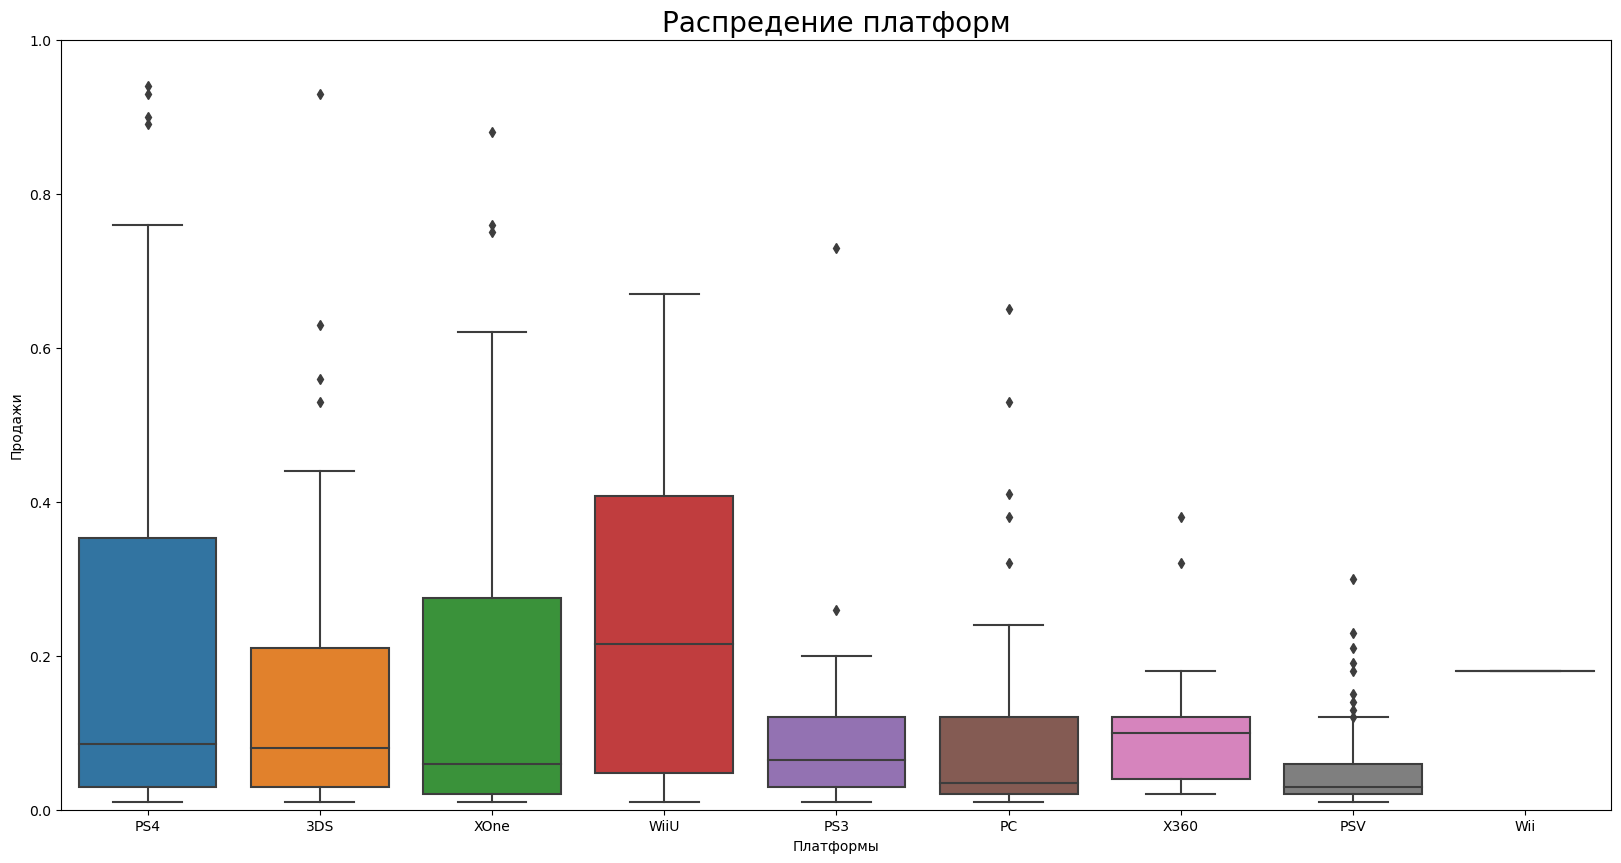

In [49]:
plt.figure(figsize=(20,10))
plt.title('Распредение платформ', fontsize=20)
sb.boxplot(y=df3['total_sales'], x=df3['platform'])
plt.ylabel('Продажи')
plt.xlabel('Платформы');
plt.ylim(0, 1) #начинал с 7ки, дальше резал выбросы, основная масса выбросов на PS4

(0.0, 0.6)

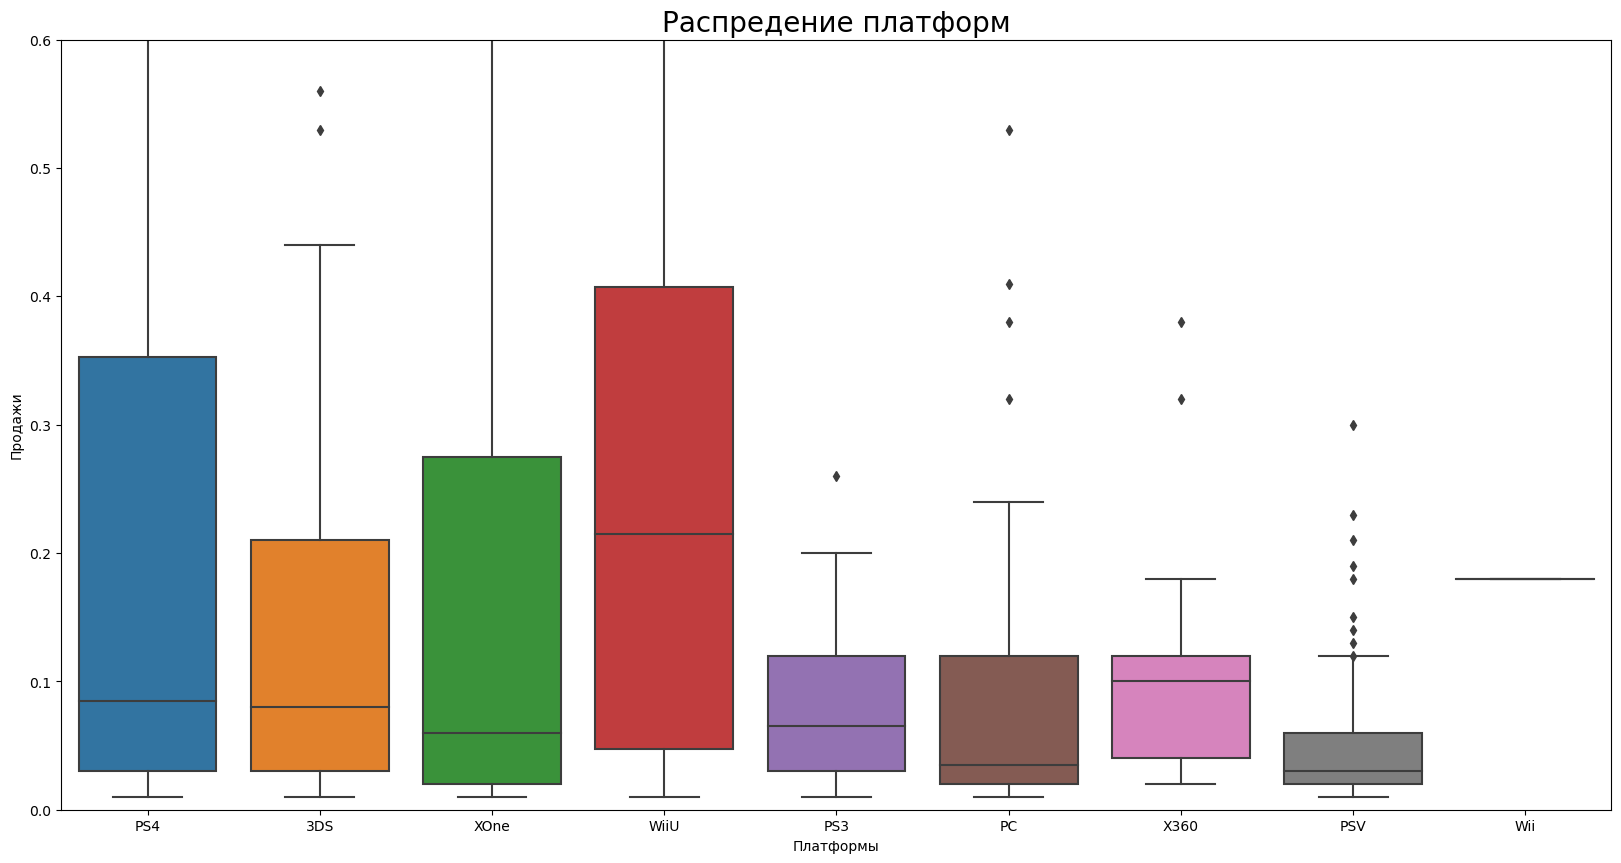

In [50]:
plt.figure(figsize=(20,10))
plt.title('Распредение платформ', fontsize=20)
sb.boxplot(y=df3['total_sales'], x=df3['platform'])
plt.ylabel('Продажи')
plt.xlabel('Платформы');
plt.ylim(0, 0.6) #начинал с 7ки, дальше резал выбросы, основная масса выбросов на PS4

У PSV много выбросов, так что покидает гонку, окончательно оставляется только следующие платформы
PS4, XOne, 3DS, PC, WiiU

In [51]:
#напоминаю, что условно я делаю проект в 2016 году, когда не знаю, что WiiU будет закрыта в 2017 году

In [52]:
total_list = ['PS4', '3DS', 'XOne', 'WiiU', 'PC']
df_total = df3.query('platform in @total_list')
display (df_total)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,unknown,7.14
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07
...,...,...,...,...,...,...,...,...,...,...,...,...
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,unknown,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01


•	Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [53]:
df_total.query ('platform == "PS4"').corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
na_sales,NaN,1.000000,0.648559,0.334150,0.875858,0.401690,-0.123691,0.846728
eu_sales,NaN,0.648559,1.000000,0.272582,0.935094,0.303289,-0.117009,0.951425
jp_sales,NaN,0.334150,0.272582,1.000000,0.328254,0.359141,0.100665,0.379156
other_sales,NaN,0.875858,0.935094,0.328254,1.000000,0.380222,-0.132005,0.996529
critic_score,NaN,0.401690,0.303289,0.359141,0.380222,1.000000,0.480147,0.375695
user_score,NaN,-0.123691,-0.117009,0.100665,-0.132005,0.480147,1.000000,-0.122461
total_sales,NaN,0.846728,0.951425,0.379156,0.996529,0.375695,-0.122461,1.000000


In [54]:
df_total.query ('platform == "XOne"').corr() #по ТЗ надо 1 столбик, но интересно сравнить две основные платформы 

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
na_sales,NaN,1.000000,0.581294,0.049094,0.963999,0.408434,-0.126506,0.910347
eu_sales,NaN,0.581294,1.000000,0.036686,0.771624,0.307704,-0.102326,0.865892
jp_sales,NaN,0.049094,0.036686,1.000000,0.055166,0.035043,0.016378,0.051238
other_sales,NaN,0.963999,0.771624,0.055166,1.000000,0.425018,-0.128409,0.985306
critic_score,NaN,0.408434,0.307704,0.035043,0.425018,1.000000,0.426034,0.412005
user_score,NaN,-0.126506,-0.102326,0.016378,-0.128409,0.426034,1.000000,-0.130303
total_sales,NaN,0.910347,0.865892,0.051238,0.985306,0.412005,-0.130303,1.000000


Для PS4 корреляция за последний год по отзывам ниже, чем для XOne

In [55]:
df_total.corr() #для всех платформ корреляция

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
na_sales,NaN,1.000000,0.598169,0.432543,0.780451,0.340555,-0.069083,0.865289
eu_sales,NaN,0.598169,1.000000,0.186045,0.919590,0.234310,-0.062384,0.896448
jp_sales,NaN,0.432543,0.186045,1.000000,0.230850,0.171131,0.152591,0.477543
other_sales,NaN,0.780451,0.919590,0.230850,1.000000,0.272790,-0.061996,0.941453
critic_score,NaN,0.340555,0.234310,0.171131,0.272790,1.000000,0.444343,0.304433
user_score,NaN,-0.069083,-0.062384,0.152591,-0.061996,0.444343,1.000000,-0.060222
total_sales,NaN,0.865289,0.896448,0.477543,0.941453,0.304433,-0.060222,1.000000


Коррелияци между отзывами и продажами 0.4, что является, по-моему, средним значением по минимальной границе. В целом покупали слушали отзывы, но вот прислушивались не всегда. 

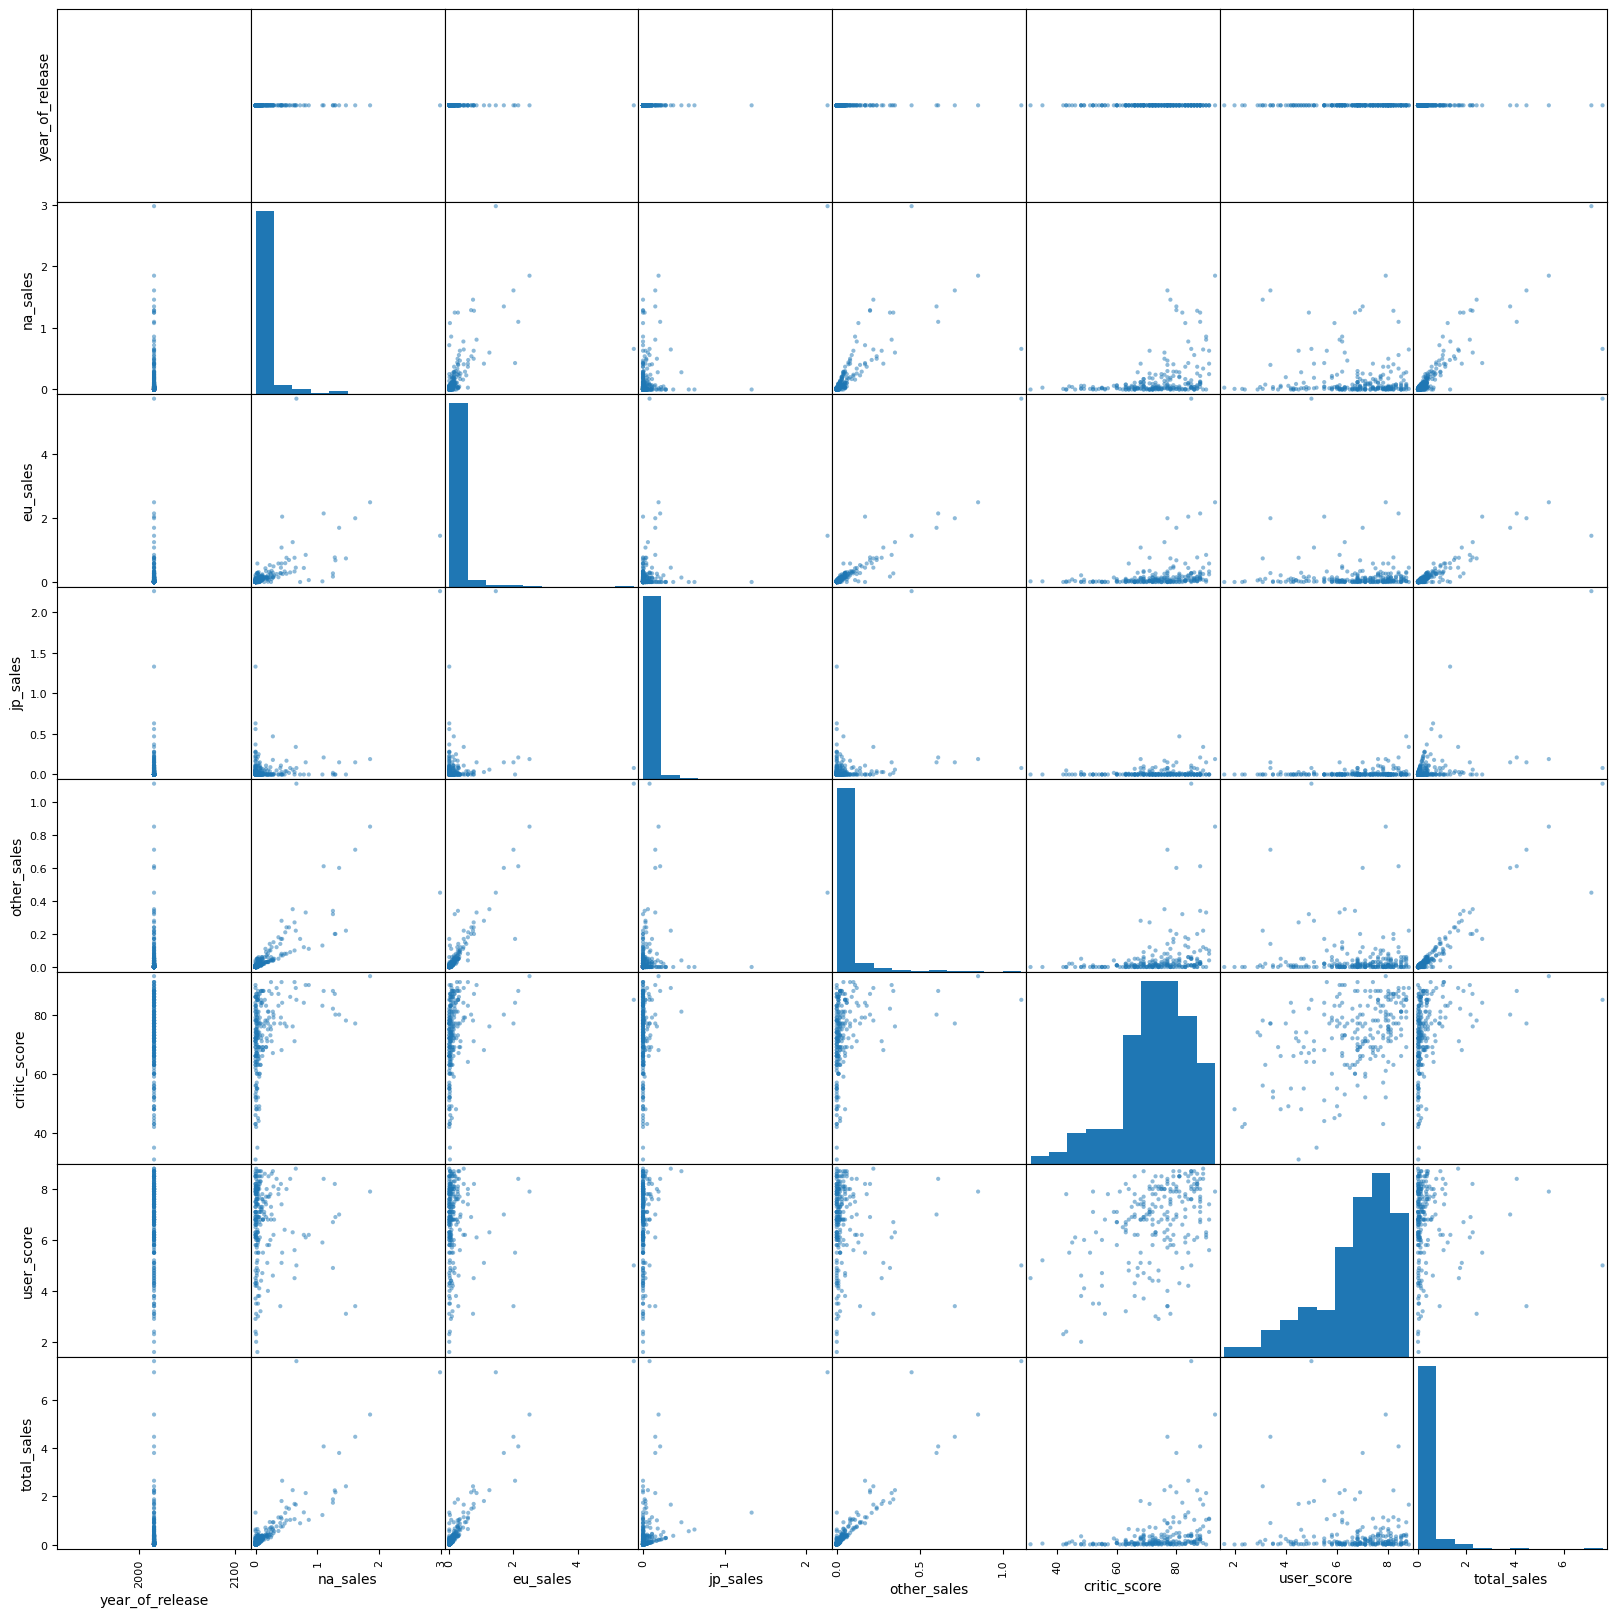

In [56]:
pd.plotting.scatter_matrix(df_total, figsize=(20, 20)) #общая диаграмма
plt.show()

<Axes: xlabel='user_score', ylabel='total_sales'>

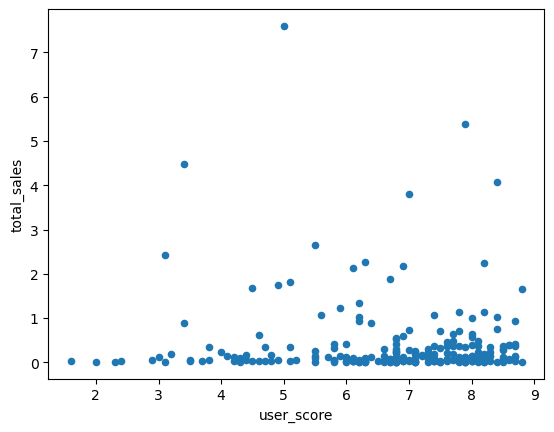

In [57]:
df_total.plot(x='user_score', y='total_sales', kind='scatter') 

<Axes: xlabel='critic_score', ylabel='total_sales'>

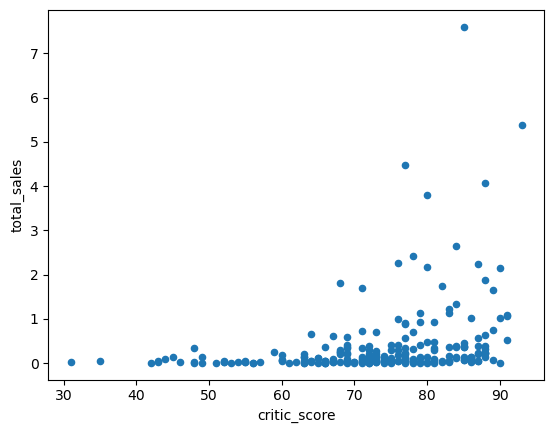

In [58]:
df_total.plot(x='critic_score', y='total_sales', kind='scatter')

Пользовательский рейтинг более хаотичный, а вот зависимость рейтинга критиков и продаж, уже более прослеживается.

•	Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

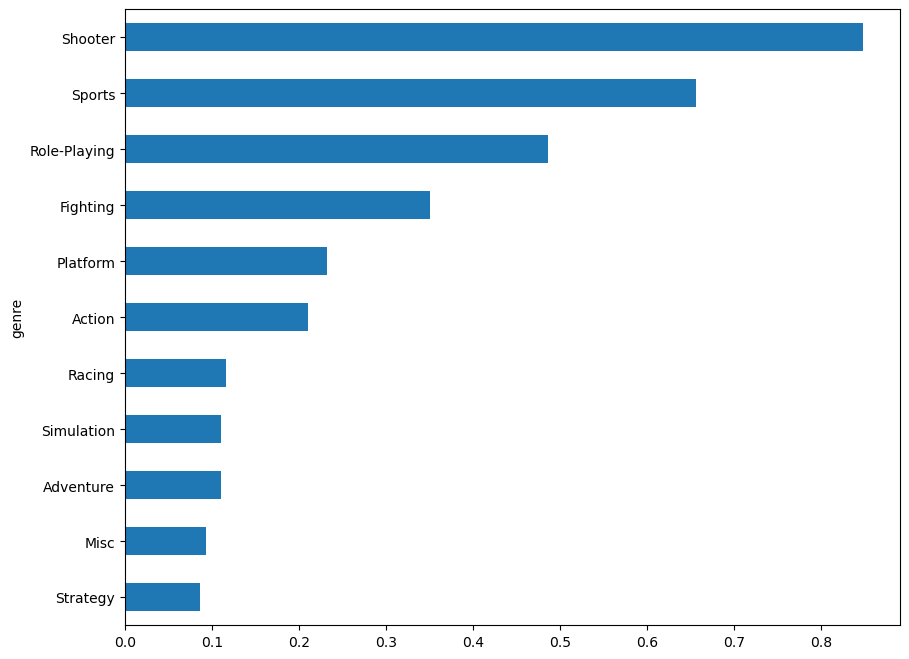

In [59]:
df_total.groupby('genre')['total_sales'].mean().sort_values(ascending=True).plot(kind='barh', figsize=(10,8));

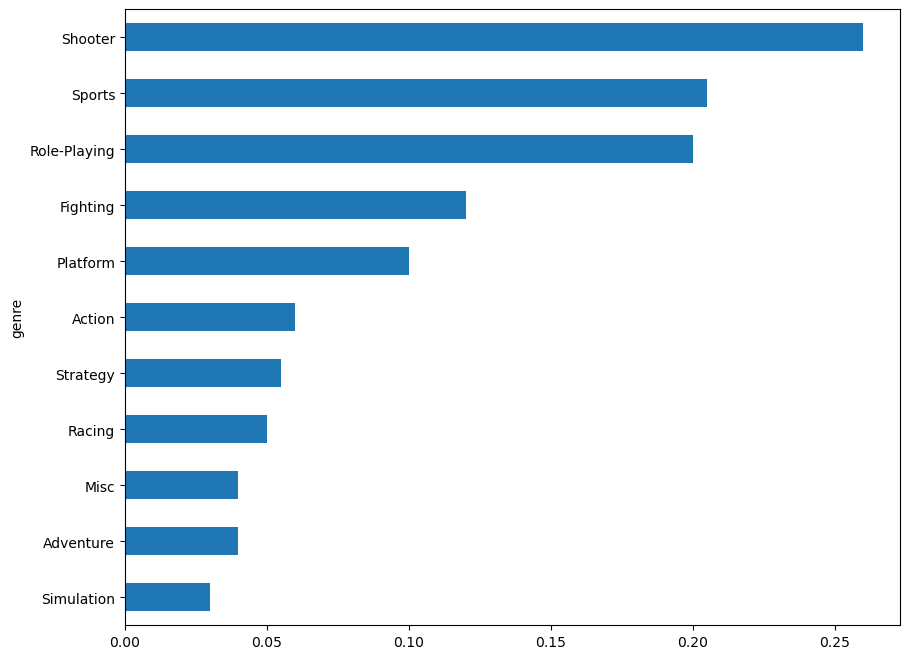

In [60]:
df_total.groupby('genre')['total_sales'].median().sort_values(ascending=True).plot(kind='barh', figsize=(10,8));

Наиболее прибыльный жанр это Shotter, далее идут спортивные симмуляторы. 
Сравним из интереса, эти данные с изначальной таблицей


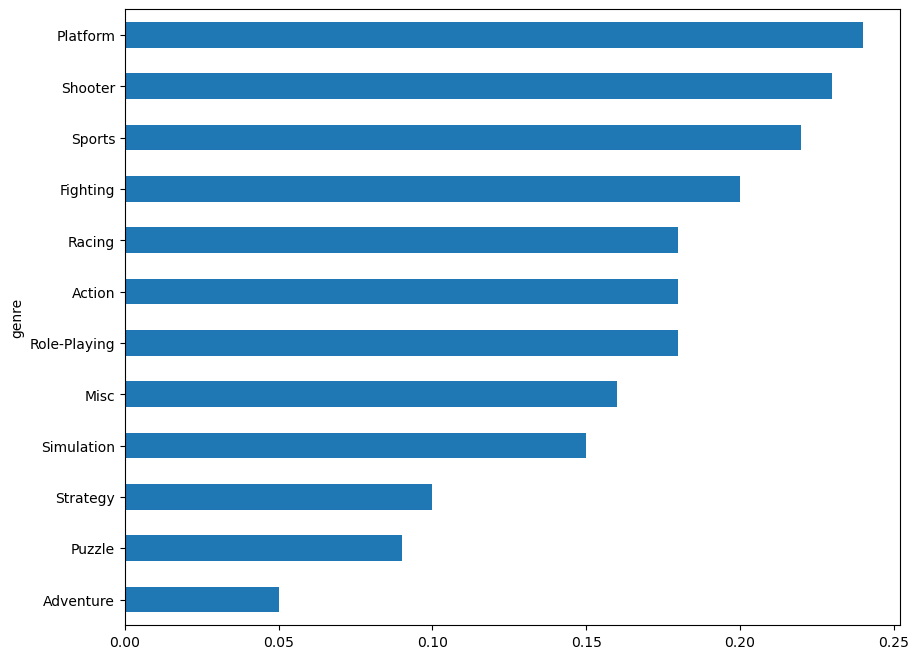

In [61]:
df.groupby('genre')['total_sales'].median().sort_values(ascending=True).plot(kind='barh', figsize=(10,8));

В целом, первые 2 места похожие, далее идут жанр Faighting, тут, наверное, отличился Мортал Комбат, поломал всю статистику и похожие игры :-) 

Шаг 4. Составьте портрет пользователя каждого региона

•	Самые популярные платформы (топ-5). Опишите различия в долях продаж.

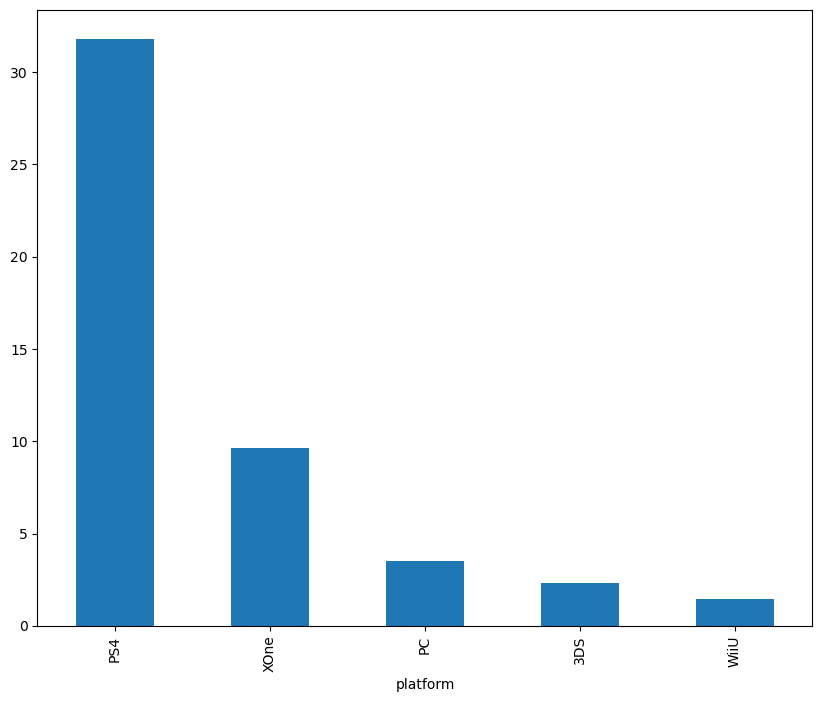

In [62]:
#продолжу рассматривать основные платформы, которые пользуются спросом в 2016 году
df_total.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).plot(kind='bar', figsize=(10,8));

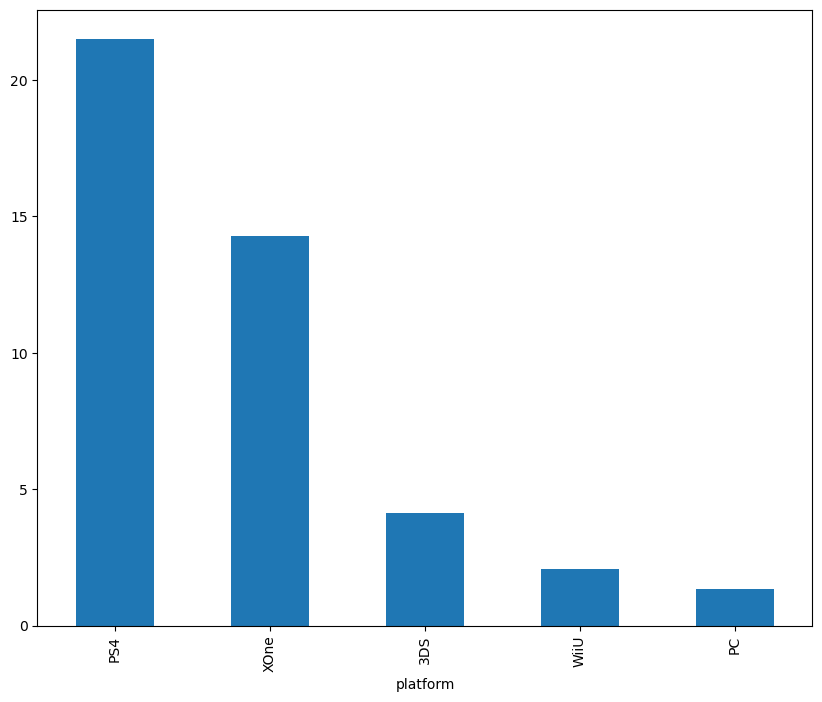

In [63]:
df_total.groupby('platform')['na_sales'].sum().sort_values(ascending = False).plot(kind='bar', figsize=(10,8));

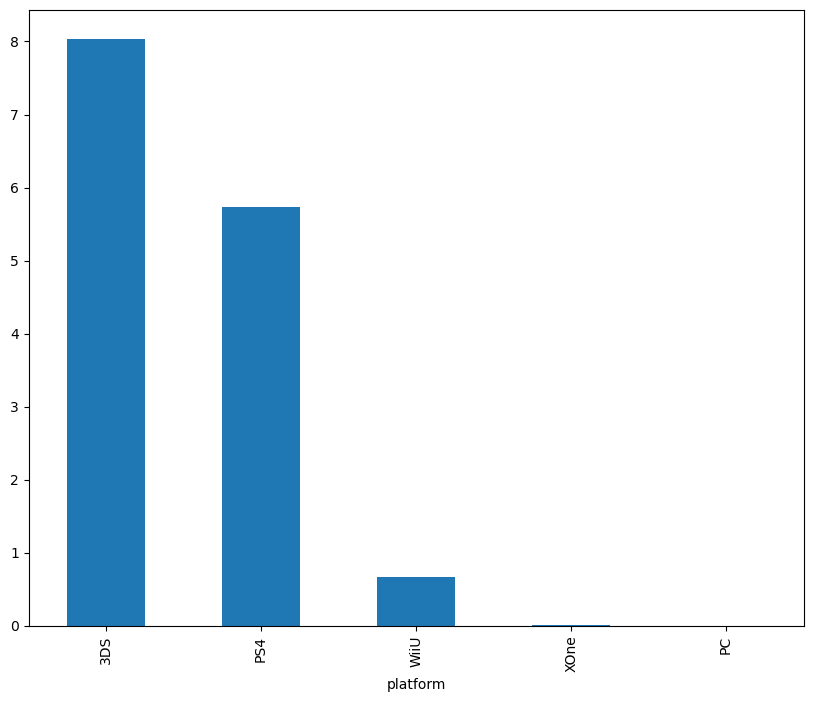

In [64]:
df_total.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).plot(kind='bar', figsize=(10,8));

Хм, а как эти значения поменяются, если добавим ещё 2015 год, у нас есть припасенная переменная как раз df_2015

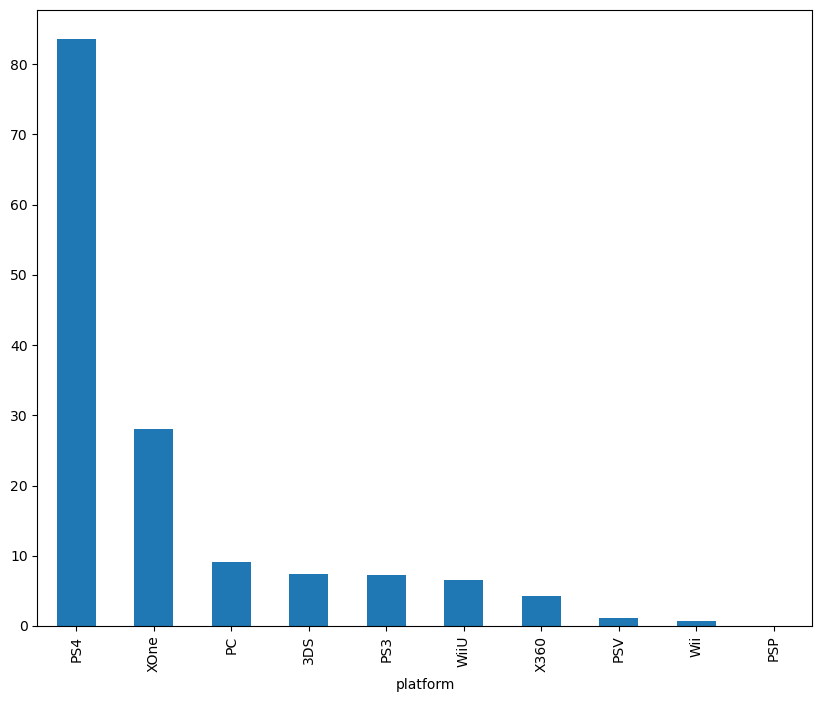

In [65]:
df_2015.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).plot(kind='bar', figsize=(10,8));

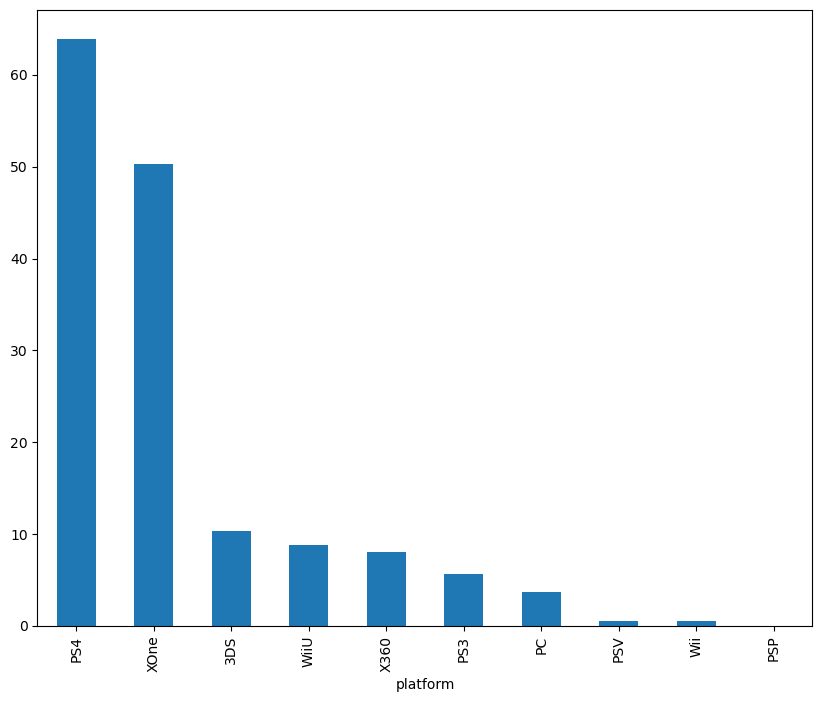

In [66]:
df_2015.groupby('platform')['na_sales'].sum().sort_values(ascending = False).plot(y='na_sales', kind='bar', figsize=(10,8));

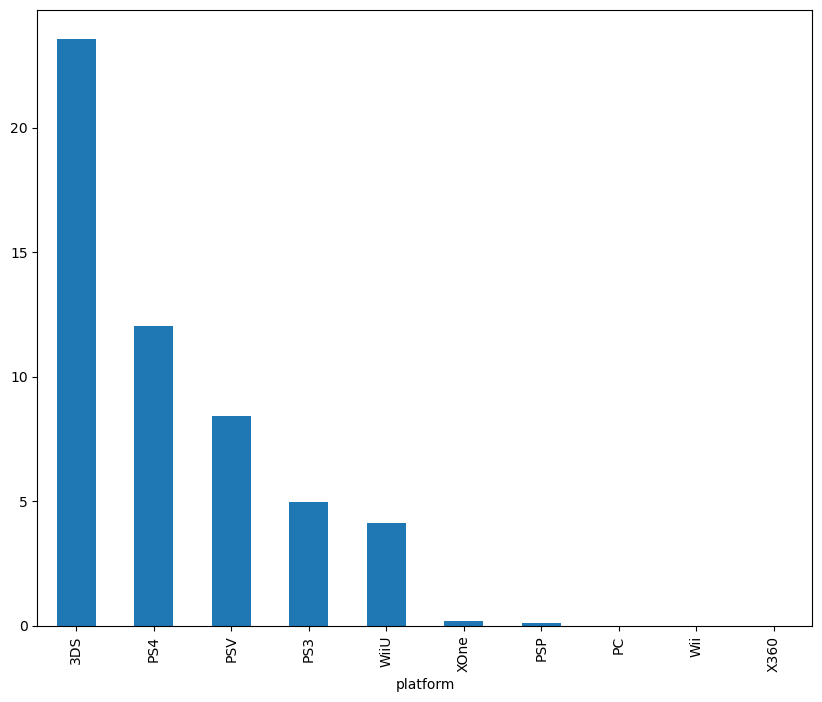

In [67]:
df_2015.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).plot(kind='bar', figsize=(10,8));

Из этого можно сделать следующий вывод:
- японский регион фанат портативных приставок, затем PS4, сильно делать маркетинг для американской компании смысла никакого, рынок очень фанатичен своему продукту
- В Европе на первом месте PS4, далее уже идет XOne. То есть европейский потребитель предпочитает стационарные приставки, но японская фирма очень значительно доминирует
- в американском регионе ситуация уже другая, PS4 обгоняет своего конкурента очень слабо, а значит, в этом региона наибольшие шансы подвинуть конкурента, здесь идет самая ожесточенная борьба между XOne и PS4


•	Самые популярные жанры (топ-5). Поясните разницу. рассмотрим сразу за 2 года

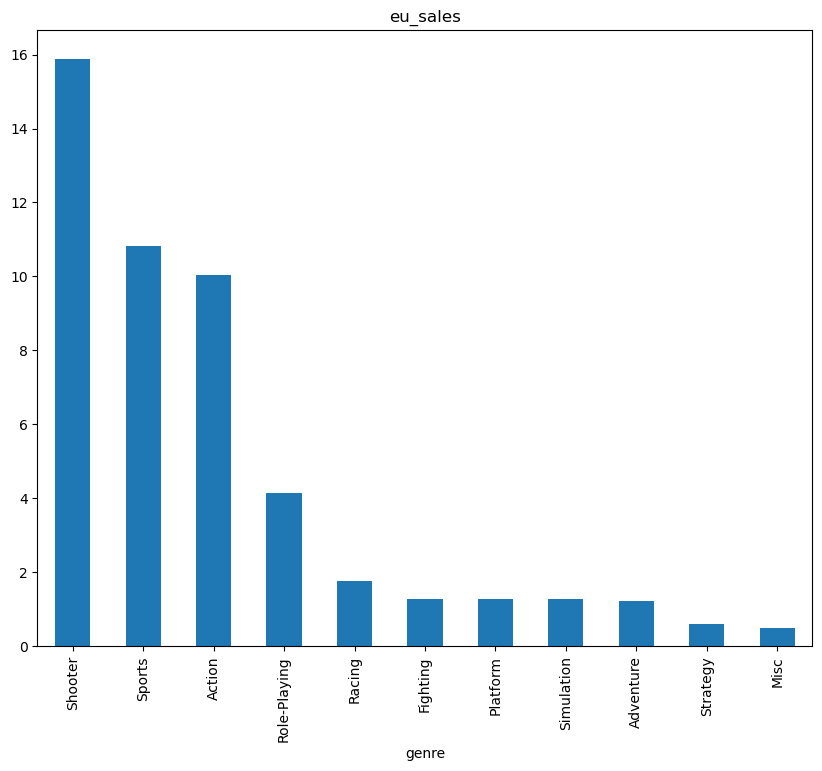

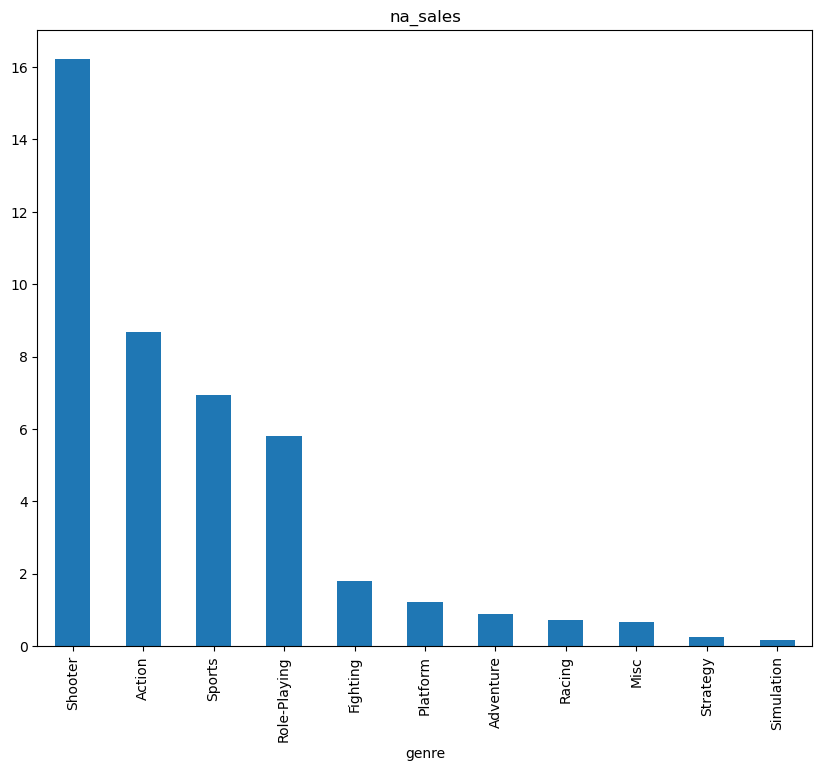

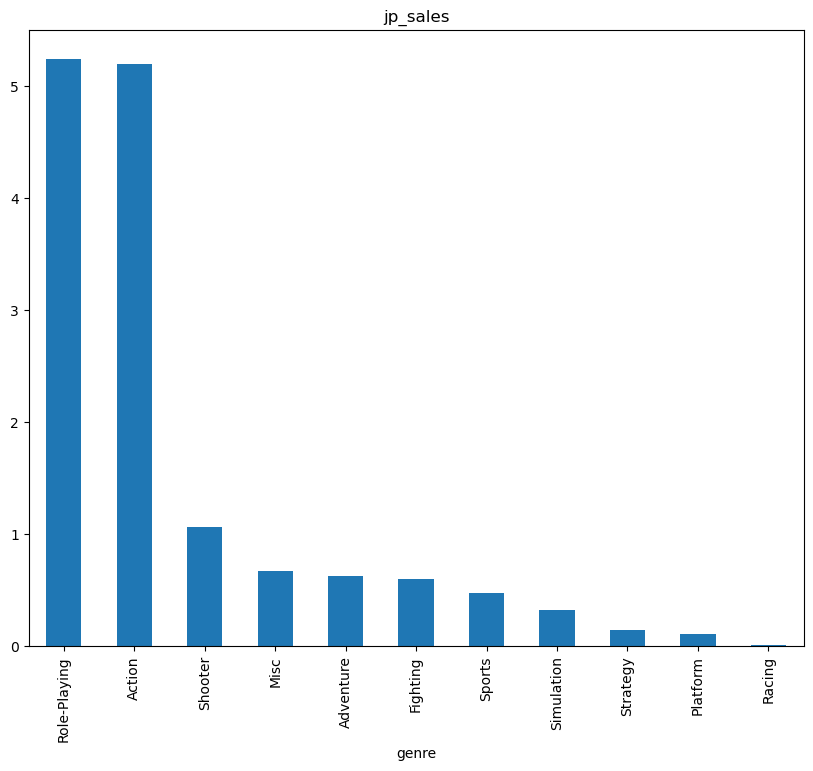

In [68]:
#получилось оптимизировать циклом, сейчас наделаю графиков =)
for i in ['eu_sales', 'na_sales', 'jp_sales']:
    df_total.groupby('genre')[i].sum().sort_values(ascending = False).plot(y = i, kind='bar', figsize=(10,8));
    plt.title(i)
    plt.show()


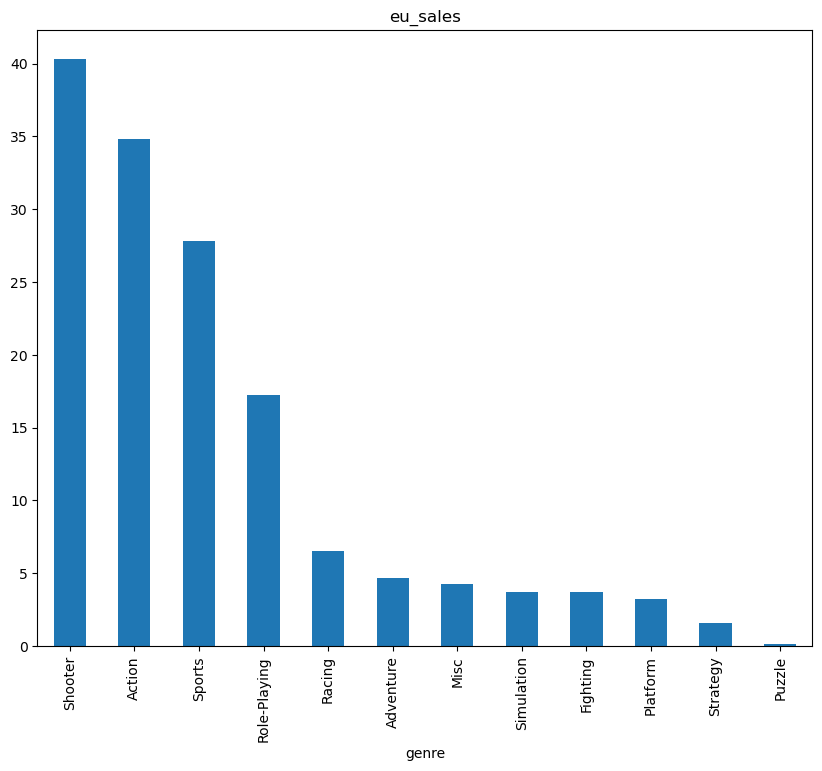

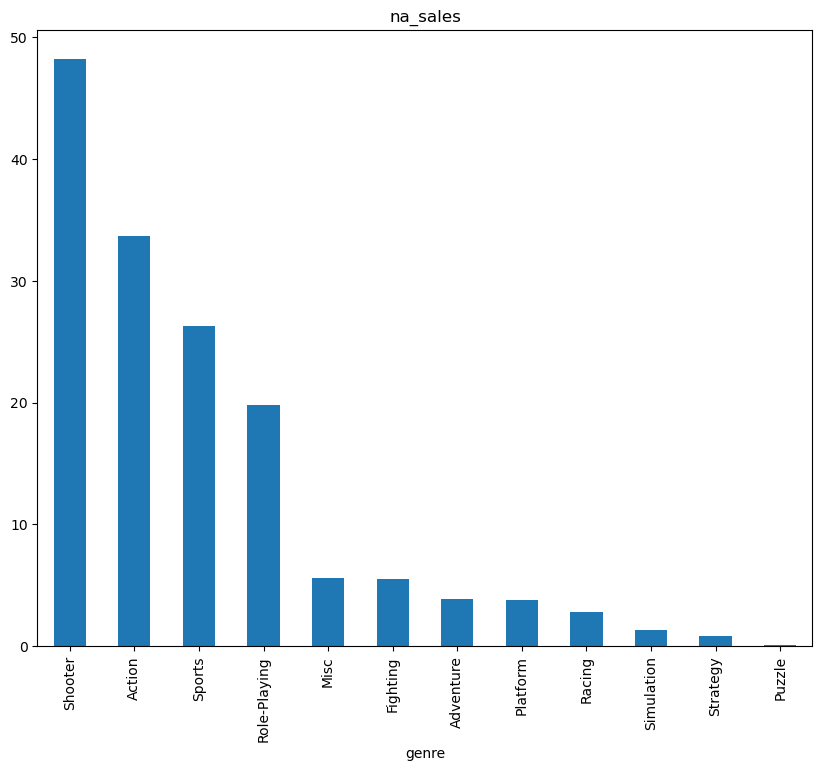

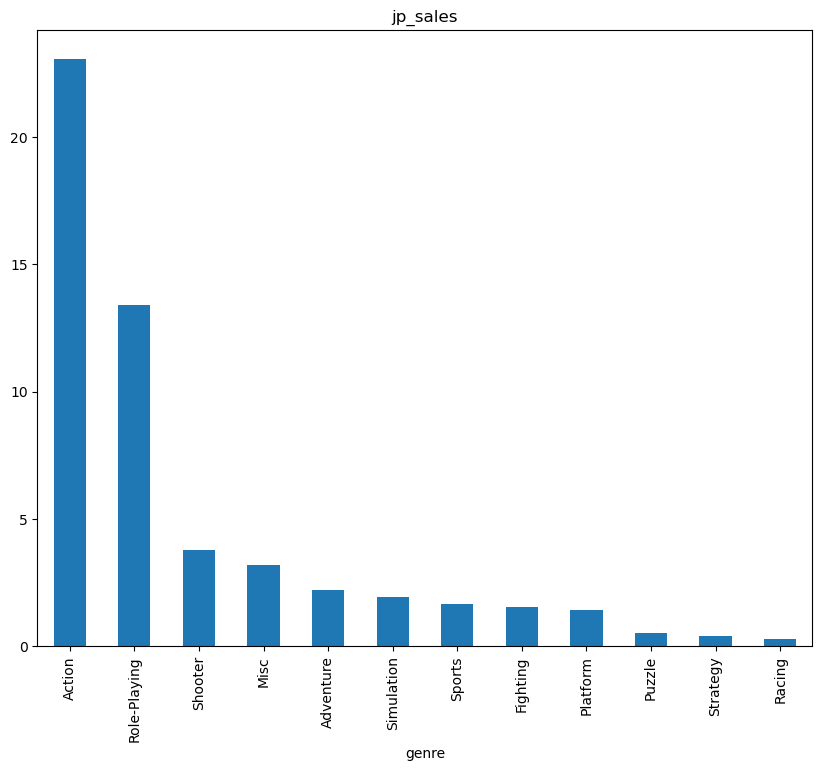

In [69]:
for i in ['eu_sales', 'na_sales', 'jp_sales']:
    df_2015.groupby('genre')[i].sum().sort_values(ascending = False).plot(y = i, kind='bar', figsize=(10,8));
    plt.title(i)
    plt.show()

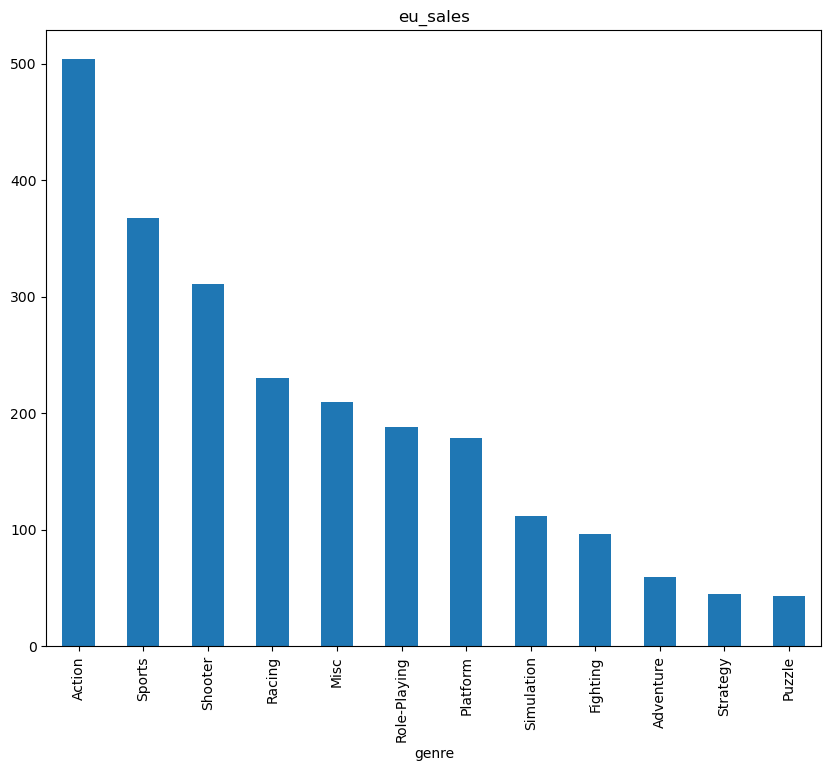

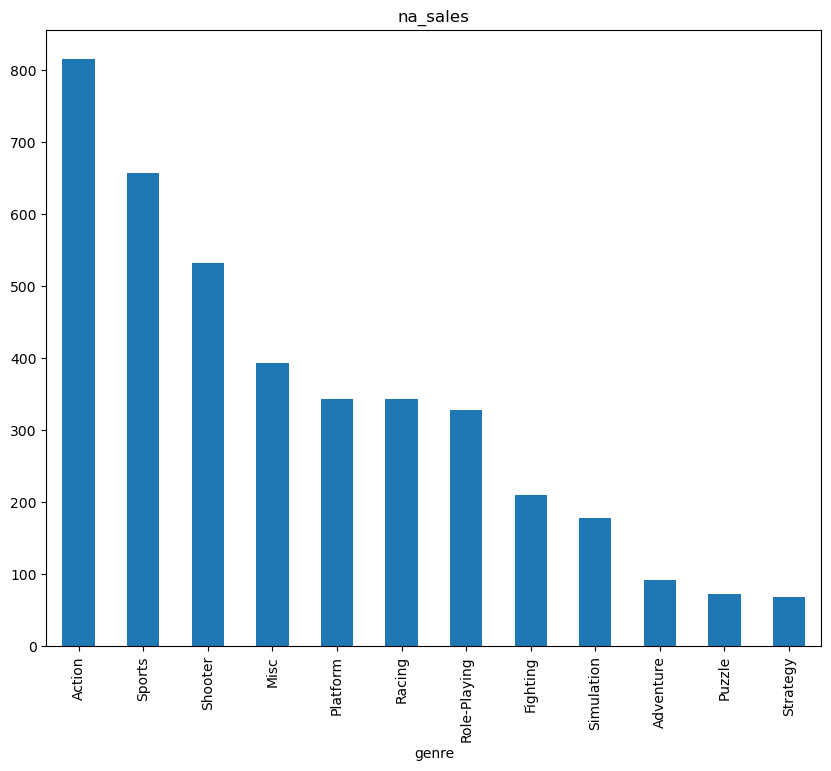

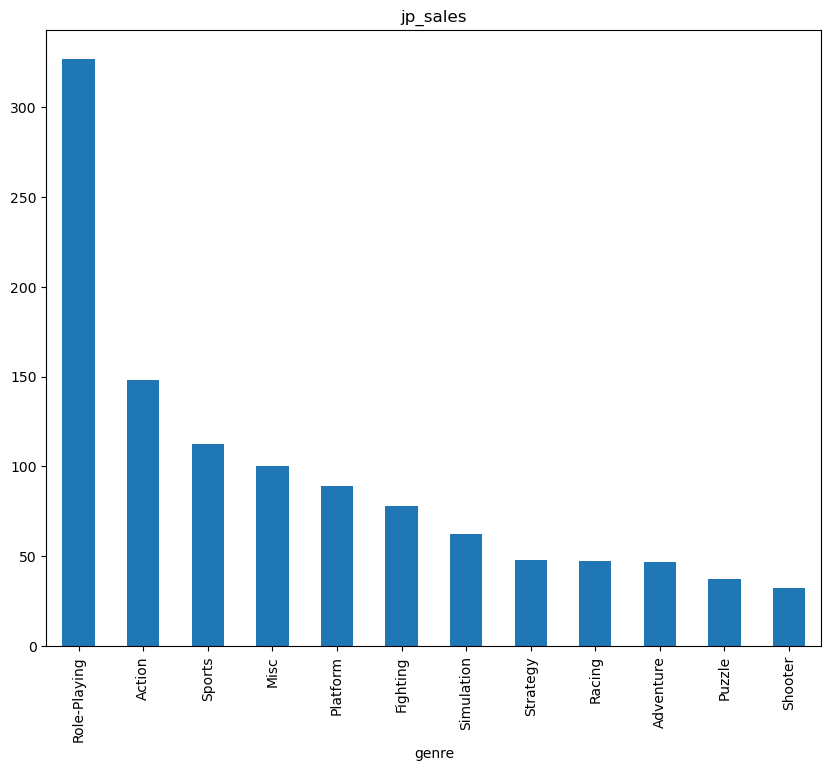

In [70]:
for i in ['eu_sales', 'na_sales', 'jp_sales']:
    df.groupby('genre')[i].sum().sort_values(ascending = False).plot(y = i, kind='bar', figsize=(10,8));
    plt.title(i)
    plt.show()

А вот здесь уже не всё так однозначно стало. Результаты графиков очень сильно зависят от "сильных" релизов в том или другом жанре. 

Европейский рынок:
1. Наиболее сильный жанр на долгой дистанции это Action. 
2. Но далее Shooter моет обгонять, если у экшена нет сильного релиза, либо наоборот, сильный релиз на Shooter. 
3. Жанр спортивных симмулиторов всегд в тройке. Если другие без сильный релизов, то спорт может взять первое место

Американский рынок:
1. На долгой дистанции наиболее сильный жанр Action, затем Sport, далее Shooter 
2. Последние 2 года наиболее популярным жанром идет Shooter, затем Action и далее Sport. 
3. С развитием технологий и возможностей игровой индустрии жанр Sport сдвинулся на 3 местро в предпочтениях пользователей.

Японский рынок:
У самураев свой путь, так как
1. На длительной дистанции жанр Role-Playing вне конкуренции 
2. За последние 2 года, видимо, за счет сильных релизов жанр Action смог обогнать Role-Playing
3. Последний год жанр Action уступил лидерство Role-Playing

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

В этих 2х подразделах всё отлично! Предпочтения геймеров 3х регионов в отношении игровых платформ и жанров определены. Ну и вывод соответственно описывает эти отличия.</div>


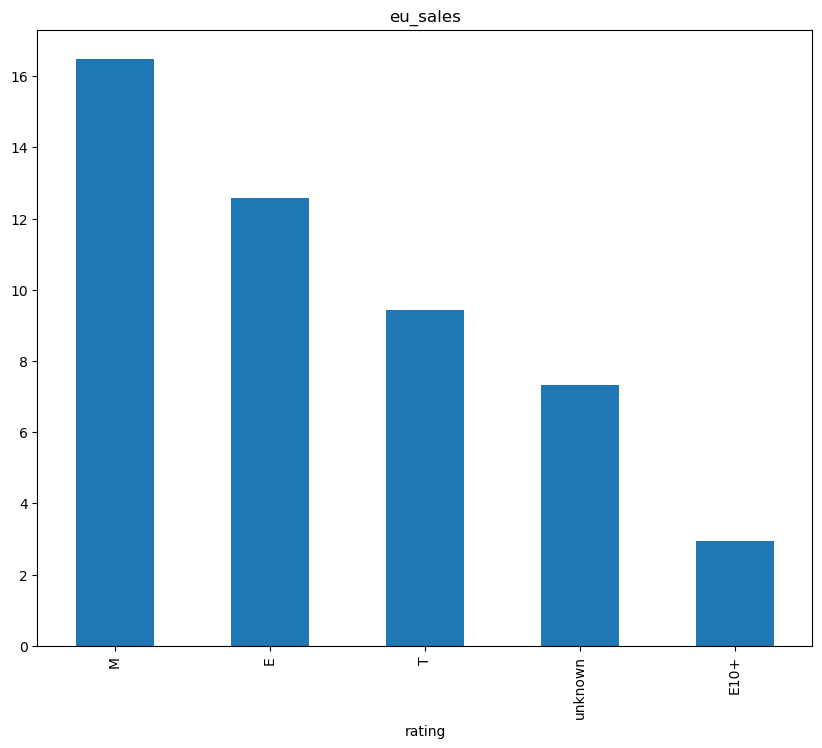

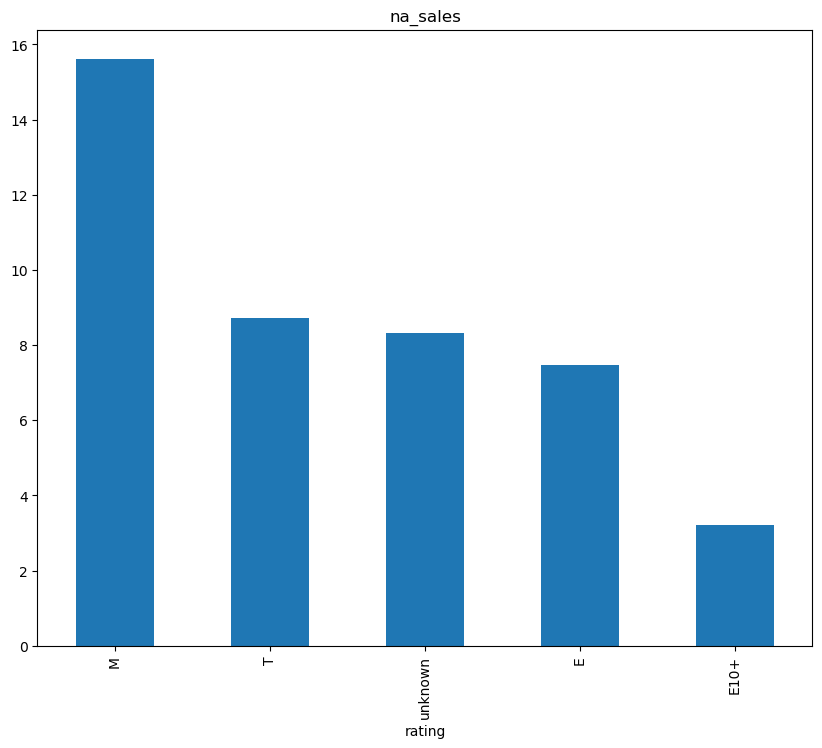

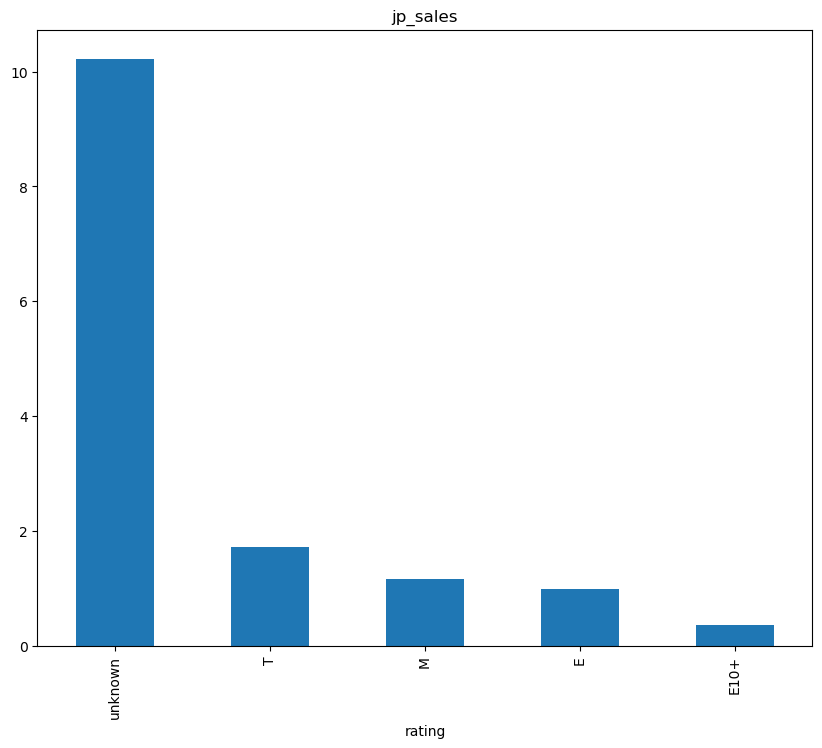

In [71]:
for i in ['eu_sales', 'na_sales', 'jp_sales']:
    df_total.groupby('rating')[i].sum().sort_values(ascending = False).plot(y = i, kind='bar', figsize=(10,8));
    plt.title(i)
    plt.show()

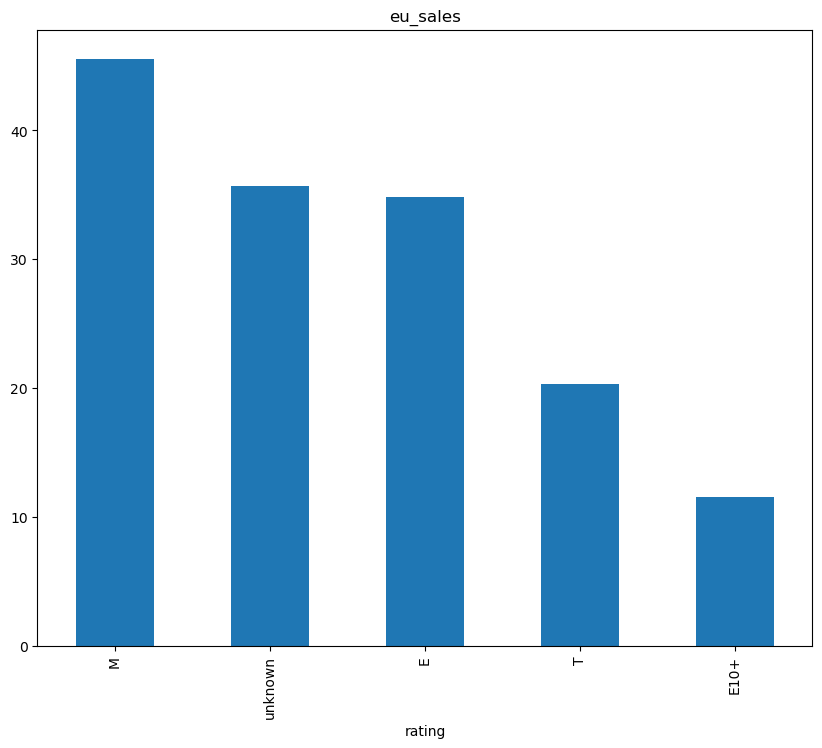

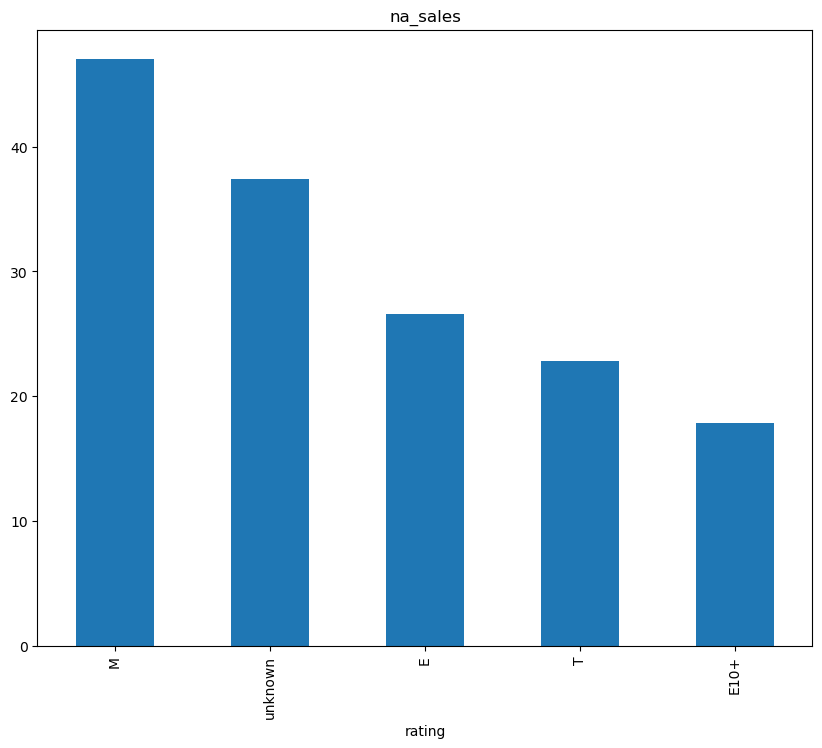

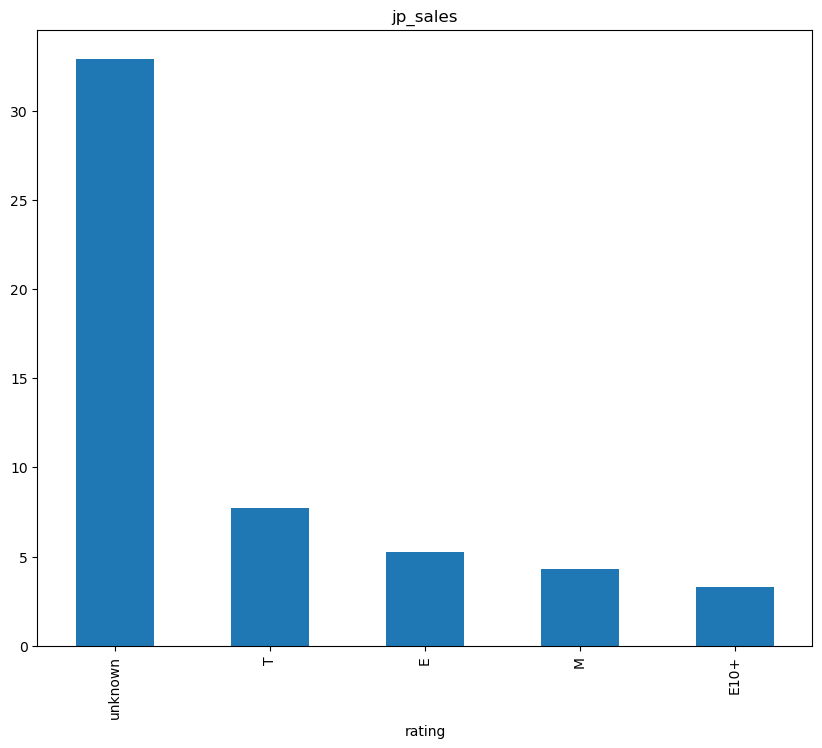

In [72]:
for i in ['eu_sales', 'na_sales', 'jp_sales']:
    df_2015.groupby('rating')[i].sum().sort_values(ascending = False).plot(y = i, kind='bar', figsize=(10,8));
    plt.title(i)
    plt.show()

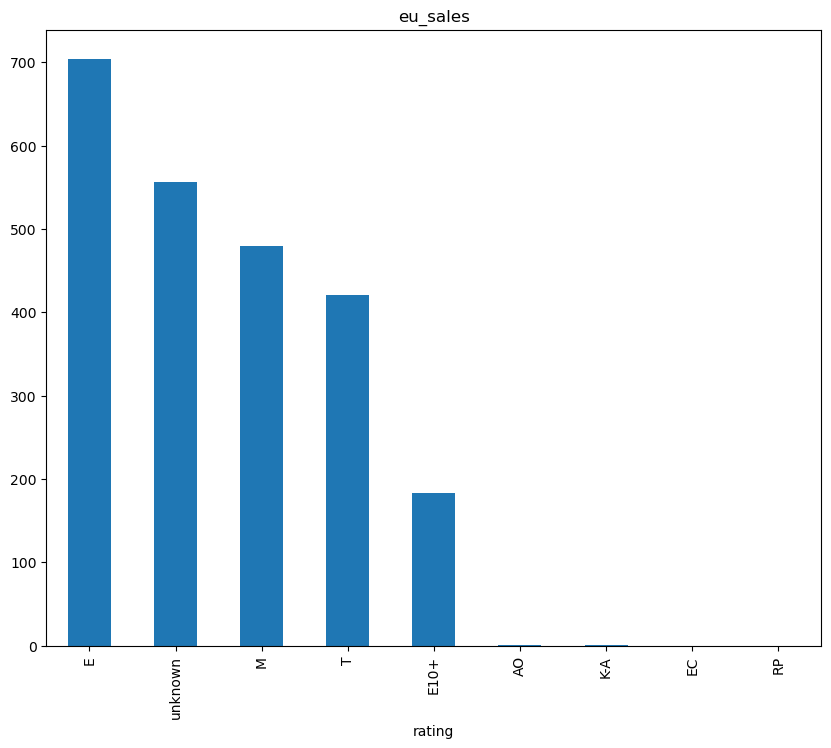

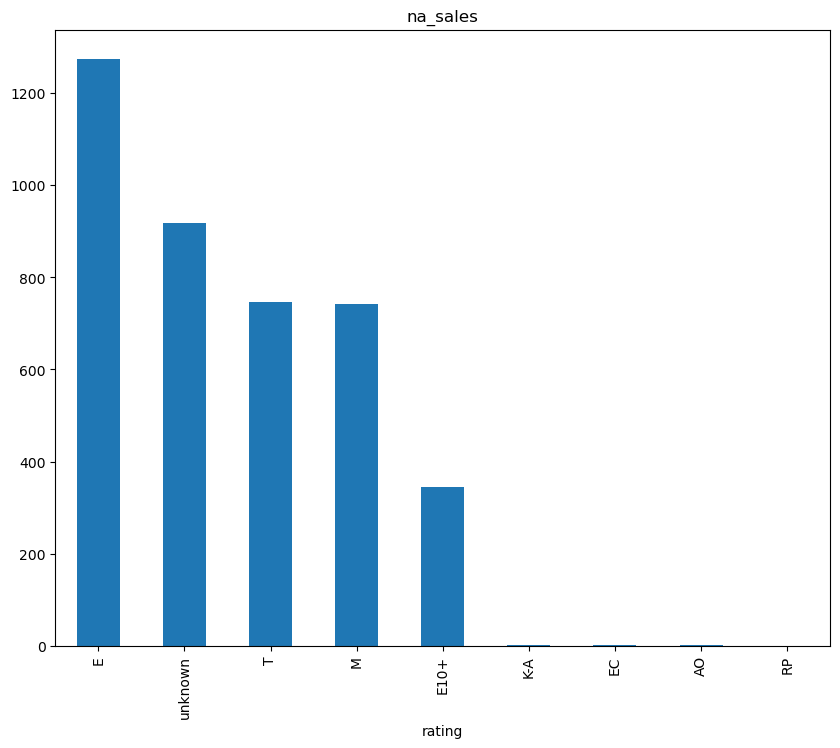

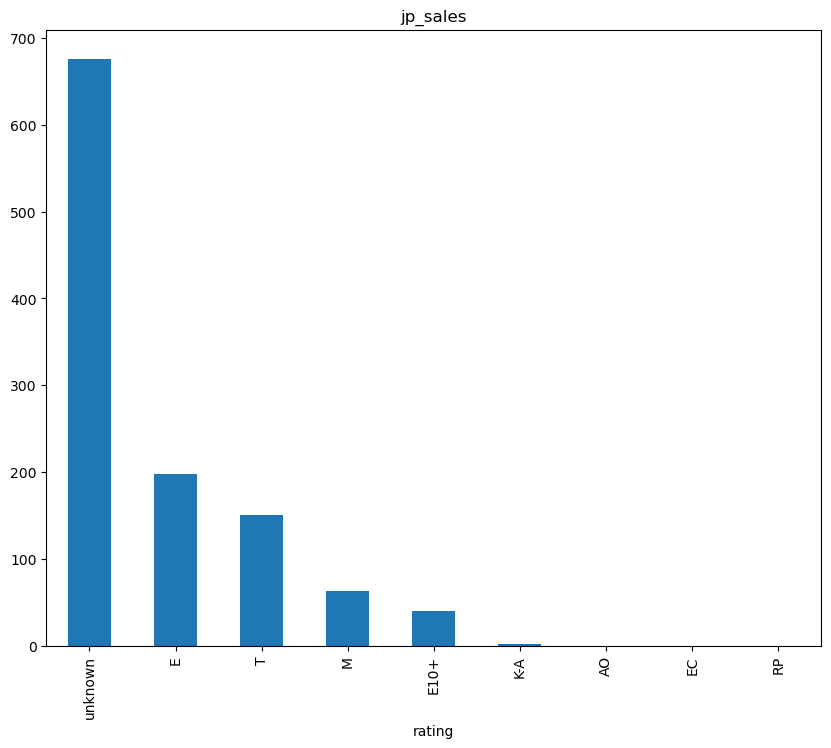

In [73]:
for i in ['eu_sales', 'na_sales', 'jp_sales']:
    df.groupby('rating')[i].sum().sort_values(ascending = False).plot(y = i, kind='bar', figsize=(10,8));
    plt.title(i)
    plt.show()

На длительной дистанции рейтинг Е преобладает для стран Европы и Америки. Всё самое популярное же в Японии не оценино американским агенством 

Далее в Америке и Европе идут игры без рейтинга, а в Японии рейтинг Т

Но если посмотреть ситуация в последние 2 года, то распределение немного другое.
В Европе и Америке рейтинги выстроились следующим образом М -> unknown -> К
В Японии же из-за другого предпочтения по жанром, доминирующий рейтинг получился  Unk -> E -> T
Таким образом "вкусы" сместились в Европе И Америке с Е на М, у японцев же поменялось второе место, с Е на Т

Шаг 5. Проверьте гипотезы

Сформулируем гипотезу:

H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H1 - Средние пользовательские рейтинги платформ Xbox One и PC отличаются;

In [74]:
#для оценки возьмем данные за 2015 и 2016 год, сравним Xbox и PC
pc_2015 = df_2015.query ('platform == "PC"')
pc_2015['user_score'].mean()

6.296428571428573

In [75]:
xbox_2015 = df_2015.query ('platform == "XOne"')
xbox_2015['user_score'].mean()

6.542148760330578

In [76]:
pc_2015.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1530,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17
2851,The Witcher 3: Wild Hunt,PC,2015,Role-Playing,0.21,0.46,0.0,0.05,93.0,9.3,M,0.72
3123,Farming Simulator 17,PC,2016,Simulation,0.03,0.58,0.0,0.04,64.0,8.0,E,0.65
3666,Star Wars Battlefront (2015),PC,2015,Shooter,0.13,0.38,0.0,0.04,NaN,NaN,unknown,0.55


In [77]:
#примем альфа в 5%, 0.05
alpha = .05

results = st.ttest_ind(xbox_2015['user_score'].dropna(), pc_2015['user_score'].dropna(), equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


Сформулируем гипотезу:

Н0: Средние пользовательские рейтинги жанров Action и Sports  разные.

Н1: Одинаковые

In [78]:
#для оценки возьмем данные за 2015 и 2016 год, сравним Xbox и PC
action_2015 = df_2015.query ('genre == "Action"')
action_2015['user_score'].mean()

6.808290155440415

In [79]:
sport_2015 = df_2015.query ('genre == "Sports"')
sport_2015['user_score'].mean()

5.198780487804878

In [80]:
#примем альфа в 5%, 0.05
alpha = .05

results = st.ttest_ind(action_2015['user_score'].dropna(), sport_2015['user_score'].dropna(), equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue > alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.97163549920592e-10
Не получилось отвергнуть нулевую гипотезу


Вывод: 

1. у нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются
2. у нас нет оснований утверждать, что средние пользовательские рейтинги жанров Action  и Sports  одинаковые


Шаг 6. Напишите общий вывод

На длительной дистанции рейтинг Е преобладает для стран Европы и Америки. Всё самое популярное же в Японии не оценино американским агенством 

Далее в Америке и Европе идут игры без рейтинга, а в Японии рейтинг Т

Но если посмотреть ситуация в последние 2 года, то распределение немного другое.

В Европе и Америке рейтинги выстроились следующим образом М -> unknown -> К
В Японии же из-за другого предпочтения по жанром, доминирующий рейтинг получился  Unk -> E -> T

Таким образом "вкусы" сместились в Европе И Америке с Е на М, у японцев же поменялось второе место, с Е на Т



японский регион фанат портативных приставок, затем PS4, сильно делать маркетинг для американской компании смысла никакого, рынок очень фанатичен своему продукту

В японии на первом месте PS4, далее уже идет XOne. То есть европейский потребитель предпочитает стационарные приставки, но японская фирма очень значительно доминирует

в американском регионе ситуация уже другая, PS4 обгоняет своего конкурента очень слабо, а значит, в этом региона наибольшие шансы подвинуть конкурента, здесь идет самая ожесточенная борьба между XOne и PS4

За последние 2 года тенденции начали меняться
Европейский рынок:

Наиболее сильный жанр на долгой дистанции это Action.
Но далее Shooter моет обгонять, если у экшена нет сильного релиза, либо наоборот, сильный релиз на Shooter.
Жанр спортивных симмулиторов всегд в тройке. Если другие без сильный релизов, то спорт может взять первое место

Американский рынок:

На долгой дистанции наиболее сильный жанр Action, затем Sport, далее Shooter
Последние 2 года наиболее популярным жанром идет Shooter, затем Action и далее Sport.
С развитием технологий и возможностей игровой индустрии жанр Sport сдвинулся на 3 местро в предпочтениях пользователей.

Японский рынок: У самураев свой путь, так как

На длительной дистанции жанр Role-Playing вне конкуренции
За последние 2 года, видимо, за счет сильных релизов жанр Action смог обогнать Role-Playing
Последний год жанр Action уступил лидерство Role-Playing

за 2016 год ситуация 
японский регион фанат портативных приставок, затем PS4, сильно делать маркетинг для американской компании смысла никакого, рынок очень фанатичен своему продукту

В Европе на первом месте PS4, далее уже идет XOne. То есть европейский потребитель предпочитает стационарные приставки, но японская фирма очень значительно доминирует

в американском регионе ситуация уже другая, PS4 обгоняет своего конкурента очень слабо, а значит, в этом региона наибольшие шансы подвинуть конкурента, здесь идет самая ожесточенная борьба между XOne и PS4

если данный анализ делает, например, компания xbox, то им надо обратить внимание маркетинга на американский рынок, в нём за счет меньшие инвестии можно получить большую прибыль и уже с этими средствами идти пытаться "выбирать" конкурентов на других рынках

Наиболее прибыльный жанр может меняться от года к году, всё зависит от "сильных" релизов на платформе. Универсальной формулы не существует. Но в целом спорт, экшен, шутер и Roual наиболее успешные жанры, остальные принесут меньшие продажи. Данный вывод больше для новых компаний, если вы хотите сделать игру в жанре гонки, то шансы на её "выстрел" намного ниже, чем у шутера или экшена, ниша занята и небольшая, сложно будет забирать свои %


Корреляция между продажами и оценкой пользователей почти отсутствует. Взаимосвязь же продаж и оценками критиков намного существеннее

<b>Среднее время жизни платформы составляет более 6 лет, соответственно это важно для разработчиков, если игра на старте разработки, время создания около 3х лет, то надо уже задуматься, есть ли смысл делать под старую платформу, тратить на это время и ресурсы. </b>

PS4, XOne, 3DS, PC оставляем - наиболее перспективные направления для разработки игр на 2017 и 2018 год

ВАЖНО: для полного анализа необходимо работать с новостным фоном, объявлениями и анонсами следующего поколения, чтоб не сделать игру на устаревшую или закрытую приставку

PC аномалия, так как игры на него выходят уже 22 года, он уникален на фоне других платформ, поэтому не вижу смысла его выкидывать. При этом у него относительно одинаковое количество игр что в 2015 году, что в 2016 году, т.е. это стабильный рынок для разработчика без скачков. В будущем же, навреное, за счет Steam он значительно увеличился, а сейчас слился с xbox

Количество игр на PS3 и X360 за 1 год, с 2015 на 2016, сократилось в 2 раза, с учетом среднего времени жизни платформы - разработка игр на эту платформу может стать бесмысленной

WiiU, первая игра на эту платформу в 2011 году, в 2017 году с учетом медианы, данная платформа ещё будет живая, поэтому её так же есть смысл оставить, но её продажи сильно падают, хорошо бы из дополнительных источников того времени, а не википедии 2022 года, получить информацию по этой платформе, что происходит, почему не настолько старая платформа в 2016 году выпустила в 2 раза меньше игр, чем в 2015 году, что произошло, какой новостной фон по этой платформе.



Выводы можно оптимизировать и добавлять в зависимости от того, для кого делается исследование. Если разработчик игр, то надо смотреть сколько уже существует платформа, её потенциал и время жизни в будущем

Если мы представитель платформы, то выбрать фокус маркетинга по регионам, расстановка релизов, распределение ресурсов студии между жанрами.

Для пользователей: на сколько стоит верить оценкам пользователей, оценки критиков имеют шансы быть показательными

1. у нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются
2. у нас нет оснований утверждать, что средние пользовательские рейтинги жанров Action  и Sports  одинаковые
